# CCE || MS Interpretation 3 | NMF by Temperature

In [1]:
# DATA HANDLING
import pandas as pd
import numpy as np
import ast
import math
from copy import deepcopy

# IMPORTING/EXPORTING
import json
import csv

# BESPOKE
import packages.spectra_visualiser.spectra_visualiser as vis
import packages.carboxy.carboxy as cbx

# VISUALISATION
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

# MACHINE LEARNING
from sklearn.decomposition import (PCA, NMF, LatentDirichletAllocation)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from scipy.spatial.distance import cosine

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
with open('output_interpretation//cce_count_rt.txt') as f:
    count_temp = json.loads(f.read())
    
count_rt = {}
for key in count_temp:
    count_rt[float(key)] = count_temp[key]
    
with open('output_interpretation//cce_count_50.txt') as f:
    count_temp = json.loads(f.read())
    
count_50 = {}
for key in count_temp:
    count_50[float(key)] = count_temp[key]
    
with open('output_interpretation//cce_count_ST.txt') as f:
    count_temp = json.loads(f.read())
    
count_ST = {}
for key in count_temp:
    count_ST[float(key)] = count_temp[key]

In [3]:
# hard coded lists as took to long to figure out how to change each internal list to list type from string
ue_rt = [
    [282.0, 758.0, 814.0],
    [282.0, 289.0, 312.0, 453.0],
    [288.0, 306.0, 362.0, 758.0],
    [675.0, 758.0, 814.0, 933.0],
    [282.0, 289.0, 312.0, 453.0, 597.0, 755.0, 870.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 440.0, 454.0, 482.0, 485.0, 758.0],
    [282.0, 289.0, 306.0, 453.0, 454.0, 482.0, 933.0],
    [252.0, 261.0, 268.0, 282.0, 312.0, 362.0, 453.0, 933.0],
    [814.0, 851.0, 854.0, 933.0],
    [282.0, 453.0, 758.0, 933.0],
    [282.0, 453.0],
    [282.0, 362.0, 453.0, 755.0, 758.0],
    [282.0, 453.0, 800.0],
    [246.0, 287.0, 288.0, 289.0, 306.0, 307.0, 424.0, 454.0, 482.0],
    [289.0, 306.0, 758.0],
    [758.0],
    [252.0, 261.0, 268.0, 282.0, 362.0, 453.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 454.0, 482.0],
    [282.0, 453.0, 758.0],
    [252.0, 259.0, 261.0, 268.0, 795.0, 854.0, 933.0],
    [282.0, 306.0, 758.0],
    [814.0, 832.0, 851.0, 911.0],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 366.0, 424.0, 440.0, 758.0],
    [362.0, 371.0, 378.0, 758.0, 933.0, 934.0, 974.0, 1012.0],
    [282.0, 306.0, 362.0, 371.0, 453.0, 933.0],
    [453.0, 854.0, 933.0],
    [282.0, 362.0, 453.0, 545.0, 933.0, 934.0, 974.0, 1007.0],
    [362.0, 758.0, 933.0, 1007.0],
    [282.0, 453.0, 933.0],
    [246.0, 287.0, 288.0, 289.0, 306.0, 307.0, 440.0, 454.0, 482.0],
    [362.0, 371.0, 758.0, 933.0],
    [282.0, 289.0, 306.0, 312.0, 322.0, 352.0, 453.0, 597.0, 755.0],
    [362.0, 371.0, 545.0, 758.0, 933.0],
    [282.0, 362.0, 371.0, 453.0, 933.0],
    [691.0, 713.0, 792.0, 814.0, 832.0, 851.0, 854.0, 911.0],
    [246.0, 282.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0, 454.0, 482.0, 933.0],
    [282.0, 289.0, 453.0, 597.0, 755.0, 758.0],
    [362.0, 371.0, 378.0, 758.0, 854.0, 933.0, 934.0, 974.0, 1012.0],
    [282.0, 289.0, 453.0, 597.0, 755.0],
    [289.0, 306.0, 307.0, 454.0, 482.0, 758.0, 933.0],
    [282.0, 634.0, 713.0, 795.0, 854.0],
    [282.0, 362.0, 371.0, 545.0, 933.0, 934.0, 974.0],
    [758.0, 933.0, 1007.0],
    [246.0,282.0,287.0,288.0,289.0,306.0,307.0,364.0,424.0,440.0,454.0,482.0,933.0],
    [282.0, 289.0, 306.0, 324.0, 453.0, 597.0, 755.0],
    [758.0, 933.0],
    [282.0, 362.0, 371.0, 758.0, 933.0],
    [675.0, 758.0, 814.0, 933.0],
    [753.0, 772.0, 776.0, 792.0, 832.0, 854.0],
    [524.0, 545.0, 566.0, 597.0, 645.0, 658.0, 776.0, 792.0, 854.0],
    [288.0, 306.0, 307.0, 776.0, 792.0, 854.0],
    [302.0, 306.0, 324.0, 326.0, 933.0],
    [776.0, 792.0, 854.0, 933.0],
    [246.0, 265.0, 288.0, 289.0, 306.0, 307.0, 366.0],
    [288.0, 289.0, 306.0, 307.0, 758.0],
    [246.0,288.0,289.0,306.0,307.0,366.0,776.0,792.0,854.0,933.0,934.0,974.0],
    [306.0,367.0,703.0,713.0,733.0,776.0,792.0,795.0,832.0,833.0,850.0,854.0,855.0,911.0,912.0,933.0,934.0,951.0,974.0,1624.0,1703.0,1704.0],
    [288.0,289.0,306.0,307.0,324.0,325.0,326.0,367.0,776.0,792.0,795.0,854.0],
    [306.0,367.0,545.0,758.0,776.0,788.0,792.0,795.0,854.0,933.0,934.0,951.0,974.0,1041.0,1235.0,1415.0,1595.0,1775.0],
    [367.0, 776.0, 792.0, 795.0, 832.0, 833.0, 854.0, 911.0, 933.0, 934.0, 974.0],
    [776.0, 792.0, 832.0, 846.0, 854.0, 925.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 366.0, 792.0, 854.0],
    [288.0, 289.0, 306.0, 307.0, 324.0, 326.0, 758.0],
    [282.0, 367.0, 367.0, 792.0, 854.0],
    [282.0, 289.0, 312.0, 367.0, 453.0, 466.0, 792.0, 795.0, 854.0, 933.0],
    [282.0,289.0,312.0,322.0,367.0,453.0,466.0,545.0,792.0,795.0,854.0,872.0,933.0],
    [282.0,282.0,283.0,289.0,312.0,320.0,322.0,453.0,466.0,503.0,545.0,597.0,634.0,674.0,713.0,755.0,758.0,792.0],
    [282.0,289.0,312.0,322.0,367.0,436.0,437.0,453.0,466.0,503.0,545.0,674.0,758.0,776.0,792.0,854.0,933.0,934.0,974.0,976.0,1041.0,1055.0,1221.0,1235.0,1415.0],
    [367.0, 758.0, 776.0, 792.0, 854.0, 933.0],
    [282.0,367.0,436.0,437.0,451.0,453.0,545.0,776.0,792.0,795.0,854.0,933.0,934.0,974.0],
    [282.0, 289.0, 312.0, 322.0, 367.0, 453.0, 466.0, 503.0, 545.0, 674.0, 753.0],
    [367.0, 367.0, 776.0, 792.0, 795.0, 832.0, 854.0, 911.0, 933.0, 1741.0],
    [282.0, 367.0, 758.0, 792.0],
    [367.0, 776.0, 792.0, 795.0, 832.0, 854.0, 933.0],
    [367.0, 367.0, 758.0, 792.0, 854.0],
    [367.0, 436.0, 437.0, 451.0, 758.0, 776.0, 792.0, 854.0, 933.0, 934.0, 974.0],
    [282.0,282.0,283.0,288.0,289.0,306.0,307.0,312.0,320.0,322.0,436.0,437.0,451.0,453.0,466.0,503.0,545.0,674.0,776.0,792.0,854.0,933.0,934.0,944.0,974.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,322.0,324.0,326.0,367.0,453.0,466.0,482.0,545.0,776.0,792.0,795.0,854.0,933.0],
    [755.0, 758.0],
    [],
    [367.0,367.0,436.0,437.0,451.0,776.0,792.0,795.0,854.0,933.0,934.0,974.0],
    [282.0,367.0,436.0,437.0,451.0,453.0,758.0,776.0,788.0,792.0,795.0,854.0,872.0,933.0,934.0,951.0,974.0],
    [758.0],
    [484.0, 563.0],
    [367.0, 436.0, 437.0, 758.0, 792.0, 854.0, 933.0, 1041.0],
    [282.0, 367.0, 453.0, 758.0, 792.0, 795.0, 854.0, 933.0],
    [776.0, 792.0, 854.0],
    [265.0,282.0,287.0,288.0,289.0,306.0,312.0,324.0,325.0,326.0,367.0,453.0,466.0,776.0,792.0,795.0,854.0],
    [758.0, 933.0, 934.0, 974.0, 1055.0, 1235.0, 1415.0, 1595.0],
    [282.0, 289.0, 312.0, 322.0, 453.0, 466.0, 503.0, 545.0, 674.0, 753.0, 933.0],
    [265.0,282.0,282.0,289.0,289.0,302.0,312.0,320.0,322.0,324.0,325.0,326.0,327.0,367.0,453.0,466.0,503.0,545.0,597.0,674.0,753.0,755.0,792.0,854.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,440.0,453.0,466.0,545.0,674.0,758.0,792.0,854.0,933.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,436.0,437.0,451.0,453.0,454.0,466.0,482.0,545.0,739.0,758.0,776.0,792.0,854.0,933.0,934.0,944.0,974.0],
    [282.0, 453.0, 674.0, 792.0, 795.0, 854.0, 933.0, 934.0, 974.0],
    [282.0, 453.0, 758.0],
    [282.0,288.0,289.0,306.0,307.0,312.0,315.0,453.0,720.0,776.0,792.0,854.0,861.0,933.0],
    [],
    [],
    [367.0, 367.0, 795.0],
    [367.0, 795.0],
    [854.0],
    [854.0],
    [],
    [795.0, 854.0],
    [854.0],
    [],
    [367.0],
    [785.0],
    [795.0],
    [],
    [],
    [367.0, 367.0, 691.0, 732.0, 750.0, 795.0],
    [],
    [785.0],
    [367.0, 795.0],
    [],
    [367.0, 795.0],
    [367.0, 795.0],
    [265.0, 291.0],
    [367.0, 367.0, 795.0],
    [246.0, 265.0, 287.0, 288.0, 289.0, 290.0, 305.0, 306.0, 307.0, 324.0, 424.0],
    [327.0, 367.0, 367.0, 732.0, 795.0],
    [265.0, 267.0, 287.0, 289.0, 302.0, 306.0, 324.0, 325.0, 326.0],
    [287.0, 289.0, 306.0, 440.0, 854.0],
    [795.0],
    [],
    [429.0],
    [265.0, 267.0, 287.0, 289.0, 306.0, 324.0, 325.0, 326.0],
    [265.0, 291.0, 302.0, 795.0],
    [265.0, 367.0, 795.0],
    [],
    [367.0, 367.0],
    [795.0, 854.0],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0, 594.0, 854.0],
    [854.0],
    [289.0, 306.0],
    [265.0, 289.0, 291.0, 306.0, 324.0, 325.0, 326.0],
    [],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0],
    [367.0],
    [367.0],
    [429.0],
    [],
    [],
    [327.0, 336.0, 367.0, 367.0, 691.0, 716.0, 732.0, 795.0],
    [634.0,645.0,691.0,692.0,713.0,720.0,776.0,792.0,792.0,795.0,834.0,835.0,836.0,854.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,594.0,634.0,645.0,691.0,713.0,720.0,792.0,792.0,834.0,835.0,836.0,854.0],
    [265.0,306.0,327.0,336.0,367.0,367.0,691.0,713.0,716.0,732.0,795.0,851.0],
    [246.0, 287.0, 288.0, 306.0, 347.0, 597.0],
    [287.0, 524.0, 645.0, 646.0, 776.0, 792.0, 854.0, 855.0],
    [265.0, 289.0, 691.0, 792.0, 795.0, 834.0, 854.0],
    [246.0, 287.0, 288.0, 289.0, 305.0, 306.0, 307.0, 347.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 305.0, 306.0, 307.0, 347.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 440.0, 597.0],
    [429.0, 785.0],
    [],
    [265.0, 267.0, 302.0, 324.0, 367.0, 795.0],
    [246.0,247.0,265.0,287.0,288.0,289.0,290.0,306.0,307.0,570.0,571.0,572.0,594.0,595.0,630.0,632.0],
    [814.0],
    [],
    [327.0, 367.0, 367.0, 691.0, 716.0, 732.0, 795.0, 851.0, 1487.0],
    [265.0, 267.0, 302.0, 324.0, 795.0],
    [634.0,645.0,691.0,713.0,720.0,776.0,792.0,792.0,795.0,832.0,833.0,834.0,836.0,851.0,854.0,911.0,912.0],
    [634.0,645.0,691.0,713.0,720.0,776.0,792.0,792.0,795.0,832.0,834.0,851.0,854.0,911.0],
    [265.0, 267.0, 306.0, 324.0, 565.0, 589.0],
    [367.0,634.0,691.0,713.0,732.0,772.0,792.0,795.0,832.0,834.0,851.0,911.0],
    [327.0, 367.0, 367.0, 732.0, 795.0],
    [691.0, 832.0, 834.0, 854.0, 911.0],
    [246.0, 265.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 440.0],
    [634.0, 645.0, 691.0, 713.0, 792.0, 795.0, 834.0, 854.0],
    [834.0],
    [246.0, 265.0, 287.0, 288.0, 289.0, 290.0, 299.0, 306.0, 307.0, 440.0, 594.0],
    [289.0, 327.0, 367.0, 367.0, 732.0, 769.0, 795.0],
    [832.0, 854.0, 911.0],
    [327.0, 367.0, 367.0, 732.0, 795.0, 851.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,308.0,380.0,440.0,570.0,594.0],
    [289.0, 306.0, 675.0, 736.0, 814.0, 815.0, 854.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,347.0,594.0,595.0,834.0],
    [246.0,287.0,288.0,289.0,306.0,307.0,367.0,390.0,524.0,566.0,594.0,645.0,720.0,740.0,823.0,824.0,834.0,837.0,838.0],
    [691.0, 834.0],
    [634.0, 645.0, 691.0, 713.0, 792.0, 795.0, 834.0, 854.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 347.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 440.0, 594.0],
    [246.0,265.0,267.0,287.0,288.0,289.0,290.0,306.0,307.0,324.0,326.0,440.0,613.0,634.0,645.0,691.0,713.0,792.0,834.0],
    [289.0, 327.0, 367.0, 367.0, 795.0],
    [245.0,246.0,247.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,380.0,424.0,440.0,570.0,594.0,595.0,630.0,834.0],
    [327.0, 367.0, 367.0, 795.0],
    [246.0, 287.0, 288.0, 289.0, 305.0, 306.0, 322.0, 347.0, 379.0, 589.0, 854.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 440.0, 594.0],
    [814.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,347.0,594.0,645.0,713.0,792.0,834.0],
    [246.0,287.0,289.0,306.0,524.0,566.0,634.0,645.0,646.0,691.0,713.0,720.0,792.0,834.0,835.0,836.0,854.0]
]

In [4]:
# hard coded lists as took to long to figure out how to change each internal list to list type from string
ue_50 = [
    [282.0, 675.0, 758.0, 814.0],
    [282.0, 289.0, 312.0, 453.0],
    [306.0, 307.0, 758.0],
    [675.0, 758.0, 814.0, 933.0],
    [282.0, 289.0, 312.0, 453.0, 597.0, 755.0, 870.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 454.0, 482.0, 758.0, 933.0],
    [282.0, 289.0, 306.0, 454.0, 482.0, 933.0],
    [252.0, 261.0, 268.0, 282.0, 312.0, 453.0, 854.0, 933.0],
    [814.0, 832.0, 854.0, 911.0, 933.0],
    [933.0],
    [282.0, 453.0],
    [282.0, 453.0, 758.0],
    [282.0, 453.0, 800.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 423.0, 424.0, 454.0, 482.0],
    [289.0, 306.0, 758.0, 933.0],
    [289.0, 758.0],
    [261.0, 268.0, 282.0, 289.0, 453.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 454.0, 482.0],
    [282.0, 758.0],
    [252.0, 259.0, 261.0, 268.0, 854.0, 933.0],
    [306.0, 758.0],
    [675.0, 814.0, 832.0, 851.0, 911.0],
    [246.0,274.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,423.0,440.0,454.0,482.0],
    [282.0, 362.0, 545.0, 933.0, 934.0, 974.0],
    [282.0, 306.0, 362.0, 933.0],
    [282.0, 453.0, 854.0, 933.0],
    [282.0, 362.0, 453.0, 545.0, 933.0, 934.0, 974.0],
    [362.0, 758.0, 933.0],
    [282.0, 453.0, 933.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 423.0, 440.0, 454.0, 482.0],
    [268.0, 758.0, 933.0],
    [282.0, 289.0, 312.0, 453.0, 597.0],
    [362.0, 545.0, 933.0, 934.0, 974.0],
    [282.0, 362.0, 453.0, 933.0],
    [453.0, 814.0, 832.0, 851.0, 854.0, 911.0, 933.0],
    [246.0, 288.0, 289.0, 306.0, 307.0, 424.0, 440.0, 454.0, 482.0, 933.0],
    [282.0, 289.0, 453.0, 484.0, 563.0, 653.0, 755.0],
    [362.0, 371.0, 378.0, 758.0, 854.0, 933.0, 934.0, 974.0, 1012.0],
    [282.0, 289.0, 453.0, 597.0, 755.0],
    [289.0, 306.0, 307.0, 454.0, 482.0, 758.0, 933.0],
    [282.0, 634.0, 713.0, 795.0, 837.0, 854.0],
    [282.0, 362.0, 371.0, 453.0, 545.0, 933.0, 934.0, 974.0],
    [545.0, 758.0, 933.0, 934.0, 974.0],
    [246.0,282.0,287.0,288.0,289.0,306.0,307.0,364.0,423.0,424.0,440.0,454.0,482.0,933.0],
    [282.0, 289.0, 289.0, 306.0, 324.0, 453.0, 755.0],
    [443.0, 758.0, 788.0, 933.0],
    [282.0, 362.0, 371.0, 758.0, 933.0],
    [675.0, 758.0, 814.0, 933.0, 974.0],
    [265.0,267.0,367.0,571.0,575.0,585.0,589.0,691.0,713.0,732.0,795.0,834.0,872.0],
    [282.0, 453.0, 634.0, 662.0, 713.0, 755.0, 792.0, 795.0, 834.0, 854.0, 872.0],
    [265.0, 267.0, 302.0, 324.0, 565.0, 569.0, 579.0, 658.0],
    [265.0, 267.0, 302.0, 324.0, 565.0, 569.0, 579.0, 658.0],
    [246.0,247.0,265.0,287.0,289.0,290.0,291.0,306.0,308.0,322.0,379.0,497.0,565.0,589.0,591.0,597.0,611.0,612.0,615.0,615.0,639.0,693.0,694.0,751.0,772.0,792.0,831.0,851.0,854.0,1059.0,1141.0,1142.0,1159.0,1160.0,1161.0,1173.0,1177.0],
    [246.0,247.0,288.0,289.0,290.0,305.0,306.0,307.0,366.0,380.0,424.0,440.0,441.0,454.0,482.0,519.0,594.0,788.0],
    [246.0,265.0,282.0,282.0,289.0,289.0,302.0,306.0,324.0,325.0,326.0,450.0,466.0,480.0,484.0,545.0,563.0,579.0,625.0,658.0],
    [245.0,246.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,366.0,380.0,424.0,440.0,441.0,454.0,482.0,788.0,854.0,919.0,933.0],
    [306.0,634.0,662.0,691.0,713.0,720.0,788.0,792.0,792.0,834.0,854.0,933.0],
    [246.0,265.0,282.0,287.0,288.0,289.0,306.0,307.0,324.0,325.0,326.0,366.0,424.0,795.0,872.0],
    [282.0,306.0,453.0,545.0,662.0,691.0,776.0,788.0,789.0,792.0,834.0,854.0,872.0,919.0,933.0,934.0,960.0,974.0,982.0,998.0,1012.0],
    [662.0, 788.0, 832.0, 854.0, 911.0, 933.0],
    [301.0, 312.0, 367.0, 453.0, 645.0, 769.0, 851.0, 865.0],
    [246.0,287.0,288.0,289.0,306.0,307.0,366.0,380.0,424.0,440.0,441.0,454.0,482.0,662.0],
    [246.0,282.0,288.0,289.0,289.0,306.0,307.0,324.0,326.0,364.0,380.0,440.0,597.0,662.0,755.0],
    [282.0, 282.0, 312.0, 367.0, 453.0, 579.0, 597.0, 658.0, 662.0, 755.0],
    [282.0, 312.0, 453.0, 597.0, 662.0, 755.0, 792.0, 854.0],
    [282.0, 312.0, 453.0, 597.0, 662.0, 755.0, 792.0, 854.0],
    [453.0, 597.0, 662.0, 755.0],
    [282.0, 312.0, 442.0, 453.0, 662.0, 788.0, 789.0, 854.0, 919.0, 933.0, 998.0],
    [282.0, 453.0, 662.0, 788.0],
    [282.0, 453.0, 662.0, 788.0, 854.0, 872.0, 933.0],
    [282.0, 453.0, 597.0, 662.0, 755.0],
    [282.0, 453.0, 662.0, 854.0],
    [282.0, 312.0, 453.0, 597.0, 662.0, 755.0],
    [282.0, 453.0, 662.0, 776.0, 792.0, 795.0, 854.0, 872.0],
    [597.0, 755.0, 854.0],
    [442.0, 453.0, 758.0, 788.0, 789.0, 854.0, 919.0, 933.0],
    [288.0,289.0,306.0,307.0,380.0,424.0,440.0,453.0,454.0,482.0,662.0,788.0,919.0,933.0],
    [221.0,246.0,288.0,289.0,290.0,306.0,307.0,324.0,364.0,365.0,366.0,380.0,424.0,440.0,662.0,872.0],
    [282.0, 597.0, 755.0, 758.0],
    [282.0, 453.0, 661.0, 662.0, 721.0, 800.0],
    [442.0, 788.0, 854.0, 919.0, 933.0, 934.0, 961.0, 974.0, 992.0, 1012.0],
    [282.0,312.0,442.0,453.0,545.0,662.0,720.0,788.0,789.0,792.0,795.0,854.0,872.0,919.0,933.0,934.0,974.0],
    [585.0,661.0,662.0,675.0,703.0,721.0,722.0,736.0,753.0,800.0,801.0,814.0],
    [271.0, 282.0, 282.0, 289.0, 312.0, 375.0, 453.0, 484.0, 563.0],
    [662.0, 758.0, 788.0, 854.0, 919.0, 933.0],
    [282.0, 453.0, 597.0, 755.0, 795.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,306.0,307.0,570.0,594.0,595.0,596.0,630.0],
    [246.0,265.0,282.0,282.0,288.0,289.0,306.0,307.0,324.0,325.0,326.0,380.0,440.0,597.0,662.0,755.0],
    [282.0, 662.0, 758.0, 788.0, 933.0],
    [442.0, 453.0, 662.0, 933.0],
    [246.0,265.0,282.0,282.0,288.0,289.0,302.0,306.0,307.0,324.0,325.0,326.0,440.0,453.0,597.0,662.0,755.0],
    [246.0,288.0,289.0,306.0,307.0,380.0,397.0,440.0,454.0,482.0,758.0,788.0,919.0,933.0],
    [288.0,289.0,306.0,307.0,380.0,440.0,454.0,482.0,662.0,788.0,919.0,933.0],
    [453.0, 662.0, 788.0, 854.0, 933.0],
    [597.0, 662.0, 755.0, 758.0, 788.0],
    [245.0,246.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,364.0,366.0,380.0,424.0,440.0,441.0],
    [854.0, 933.0, 934.0, 974.0],
    [854.0, 933.0],
    [870.0],
    [],
    [814.0, 933.0],
    [933.0],
    [854.0, 933.0, 934.0, 974.0],
    [795.0, 854.0, 933.0, 934.0, 974.0],
    [362.0, 854.0, 914.0, 933.0],
    [933.0, 934.0, 974.0],
    [],
    [],
    [795.0, 854.0, 872.0, 933.0, 934.0, 974.0],
    [429.0],
    [429.0, 484.0, 563.0, 653.0, 851.0],
    [367.0, 634.0, 732.0, 792.0, 795.0, 851.0, 854.0, 872.0],
    [],
    [758.0, 933.0],
    [],
    [758.0],
    [],
    [],
    [246.0,265.0,267.0,287.0,288.0,289.0,290.0,306.0,307.0,324.0,326.0,424.0,570.0,575.0,589.0,591.0,594.0],
    [327.0, 367.0, 367.0, 484.0, 563.0],
    [245.0, 246.0, 288.0, 289.0, 290.0, 305.0, 306.0, 307.0, 424.0, 454.0, 482.0],
    [367.0, 367.0, 732.0, 795.0],
    [265.0, 288.0, 289.0, 306.0, 307.0, 324.0, 326.0, 440.0, 454.0, 482.0],
    [288.0, 289.0, 306.0, 454.0, 482.0, 933.0],
    [933.0],
    [933.0],
    [429.0, 600.0],
    [246.0,265.0,288.0,289.0,306.0,307.0,308.0,324.0,326.0,445.0,454.0,461.0,482.0],
    [265.0, 267.0, 287.0, 289.0, 306.0, 324.0, 325.0, 326.0, 795.0],
    [265.0, 289.0, 306.0, 324.0, 325.0, 326.0, 795.0],
    [933.0],
    [265.0, 302.0, 367.0, 429.0, 484.0, 563.0, 653.0],
    [776.0, 792.0, 795.0, 854.0, 933.0],
    [246.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 424.0, 454.0, 482.0],
    [933.0],
    [289.0, 306.0, 454.0, 482.0, 933.0],
    [],
    [289.0, 306.0, 307.0, 324.0, 326.0, 454.0, 482.0, 933.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,424.0,440.0,454.0,482.0,933.0],
    [265.0, 267.0, 302.0, 324.0, 367.0, 589.0],
    [933.0],
    [429.0, 484.0, 509.0, 563.0, 600.0],
    [362.0, 854.0, 933.0],
    [362.0, 933.0],
    [367.0, 367.0, 634.0, 691.0, 713.0, 732.0, 792.0, 795.0],
    [246.0,247.0,265.0,274.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,594.0,595.0,634.0,691.0,713.0,776.0,792.0,792.0,854.0],
    [246.0,247.0,265.0,274.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,594.0,595.0,634.0,645.0,691.0,713.0,792.0,792.0,854.0],
    [265.0,289.0,306.0,618.0,634.0,691.0,713.0,792.0,792.0,795.0,834.0,851.0,854.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,320.0,322.0,347.0,594.0,595.0,596.0,597.0,668.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,347.0,560.0,568.0,569.0,570.0,594.0,595.0,596.0,645.0,657.0,854.0],
    [246.0,265.0,267.0,289.0,306.0,758.0,788.0,795.0,854.0,872.0,933.0,934.0,974.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 306.0, 307.0, 594.0, 595.0, 596.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,594.0,595.0,596.0],
    [246.0,247.0,288.0,289.0,290.0,306.0,307.0,379.0,380.0,440.0,454.0,482.0,594.0,595.0,597.0,740.0],
    [429.0, 585.0, 675.0, 703.0, 736.0, 753.0, 814.0],
    [289.0, 740.0, 933.0],
    [246.0,265.0,288.0,289.0,306.0,307.0,324.0,326.0,440.0,453.0,458.0,482.0,589.0],
    [246.0,247.0,288.0,289.0,290.0,298.0,305.0,306.0,307.0,424.0,440.0,594.0,595.0,740.0],
    [289.0, 306.0, 740.0, 814.0, 933.0],
    [362.0, 443.0, 933.0],
    [246.0,289.0,306.0,645.0,691.0,713.0,792.0,792.0,795.0,832.0,851.0,854.0,933.0],
    [246.0,247.0,265.0,267.0,288.0,289.0,290.0,298.0,306.0,307.0,324.0,424.0,589.0,594.0,595.0,740.0],
    [246.0,265.0,275.0,288.0,289.0,289.0,290.0,298.0,306.0,307.0,324.0,436.0,453.0,524.0,566.0,594.0,595.0,634.0,645.0,691.0,713.0,720.0,792.0,792.0,795.0,832.0,833.0,851.0,854.0,861.0,911.0,912.0],
    [246.0,289.0,306.0,453.0,566.0,594.0,595.0,645.0,691.0,713.0,720.0,792.0,792.0,795.0,832.0,851.0,854.0,861.0,911.0,933.0],
    [246.0,287.0,288.0,289.0,290.0,297.0,298.0,305.0,306.0,307.0,364.0,424.0,440.0,454.0,482.0,524.0,594.0,740.0],
    [246.0,288.0,289.0,290.0,298.0,306.0,453.0,482.0,645.0,740.0,795.0,851.0,854.0,933.0],
    [246.0, 289.0, 295.0, 306.0, 429.0, 447.0, 524.0, 740.0, 795.0],
    [854.0, 933.0, 934.0, 974.0],
    [246.0,287.0,288.0,289.0,290.0,295.0,306.0,307.0,313.0,336.0,424.0,429.0,440.0,454.0,482.0,524.0,933.0],
    [289.0,295.0,306.0,312.0,440.0,453.0,524.0,545.0,645.0,854.0,861.0,872.0,933.0,934.0,974.0],
    [289.0, 295.0, 453.0, 524.0, 854.0, 933.0, 934.0, 974.0],
    [246.0,288.0,289.0,290.0,306.0,307.0,424.0,440.0,454.0,482.0,594.0,595.0,740.0,933.0],
    [289.0, 306.0, 367.0, 634.0, 645.0, 713.0, 732.0, 779.0, 792.0, 795.0, 854.0],
    [289.0, 295.0, 313.0, 336.0, 453.0, 454.0, 482.0, 524.0, 854.0, 933.0],
    [429.0, 447.0, 933.0],
    [246.0,288.0,289.0,290.0,306.0,307.0,308.0,397.0,423.0,440.0,454.0,482.0,483.0,485.0,594.0,595.0,740.0],
    [289.0, 306.0, 429.0, 675.0, 814.0, 933.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,366.0,440.0,594.0,595.0,645.0,740.0],
    [246.0,275.0,287.0,288.0,289.0,290.0,306.0,307.0,482.0,594.0,595.0,740.0],
    [289.0, 295.0, 313.0, 336.0, 453.0, 524.0, 854.0, 933.0],
    [289.0,645.0,691.0,788.0,792.0,795.0,854.0,872.0,933.0,934.0,951.0,961.0,974.0,975.0,1012.0],
    [246.0, 247.0, 287.0, 288.0, 289.0, 290.0, 298.0, 306.0, 594.0, 595.0, 596.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,440.0,482.0,594.0,595.0,740.0],
    [246.0,288.0,289.0,290.0,306.0,307.0,366.0,424.0,454.0,482.0,594.0,645.0,854.0,933.0,974.0],
    [282.0, 289.0, 367.0, 484.0],
    [246.0,287.0,288.0,289.0,290.0,305.0,306.0,307.0,366.0,424.0,440.0,454.0,482.0,594.0,595.0,854.0,933.0],
    [306.0],
    [246.0,247.0,265.0,275.0,286.0,287.0,288.0,289.0,290.0,290.0,301.0,306.0,307.0,320.0,322.0,347.0,379.0,493.0,527.0,560.0,575.0,589.0,591.0,594.0,595.0,596.0,611.0,613.0,740.0],
    [246.0,287.0,288.0,289.0,290.0,306.0,307.0,366.0,440.0,482.0,594.0,595.0],
    [675.0, 814.0, 933.0],
    [246.0,247.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,568.0,594.0,595.0,657.0,740.0],
    [246.0,247.0,265.0,287.0,288.0,289.0,290.0,298.0,306.0,307.0,568.0,569.0,570.0,594.0,595.0,630.0,634.0,645.0,691.0,713.0,792.0,834.0,854.0]
]

In [5]:
# hard coded lists as took to long to figure out how to change each internal list to list type from string
ue_ST = [
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 371.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,371.0,373.0,468.0,500.0,563.0,569.0,570.0,662.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,373.0,468.0,470.0,486.0,500.0,558.0,569.0,570.0,731.0,733.0,734.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,373.0,468.0,500.0,569.0,570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,509.0,563.0,568.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 371.0, 509.0, 541.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 486.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 509.0, 541.0, 569.0, 570.0],
    [255.0,256.0,313.0,343.0,354.0,371.0,373.0,468.0,486.0,500.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 563.0, 568.0, 569.0, 570.0, 662.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,486.0,500.0,505.0,569.0,669.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 509.0, 541.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 371.0, 509.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,371.0,509.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,343.0,354.0,371.0,373.0,468.0,486.0,500.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 509.0, 541.0, 569.0, 570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,369.0,371.0,373.0,468.0,470.0,486.0,500.0,558.0,569.0,570.0,731.0,733.0],
    [255.0, 256.0, 313.0, 342.0, 354.0, 355.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 569.0, 662.0, 970.0, 971.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,509.0,569.0,570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,569.0,570.0,662.0,733.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,468.0,486.0,500.0,558.0,569.0,570.0,731.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,371.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 468.0, 500.0, 509.0, 569.0, 570.0],
    [255.0,256.0,313.0,324.0,343.0,354.0,355.0,371.0,468.0,500.0,569.0,570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 369.0, 371.0, 468.0, 486.0, 500.0, 569.0, 733.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 324.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,373.0,468.0,500.0,569.0,570.0],
    [255.0,256.0,313.0,343.0,354.0,371.0,373.0,468.0,486.0,500.0,569.0,570.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,486.0,500.0,558.0,569.0,570.0,662.0,731.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 355.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 486.0, 500.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,355.0,398.0,468.0,500.0,509.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,343.0,354.0,355.0,371.0,468.0,500.0,563.0,568.0,569.0,570.0,662.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,468.0,486.0,500.0,544.0,558.0,569.0,570.0,731.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 373.0, 468.0, 500.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 343.0, 354.0, 371.0, 468.0, 500.0, 569.0, 570.0],
    [245.0,255.0,256.0,286.0,287.0,289.0,306.0,313.0,327.0,328.0,340.0,354.0,355.0,355.0,359.0,539.0,568.0,569.0,662.0],
    [255.0, 256.0, 306.0, 313.0, 354.0, 355.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 479.0, 662.0, 970.0],
    [255.0,272.0,286.0,313.0,314.0,327.0,328.0,340.0,354.0,355.0,359.0,369.0,373.0],
    [255.0,256.0,272.0,286.0,313.0,314.0,327.0,340.0,341.0,354.0,355.0,369.0,693.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 367.0, 662.0, 970.0, 971.0],
    [255.0,256.0,306.0,313.0,340.0,342.0,354.0,355.0,367.0,369.0,402.0,408.0,409.0,438.0,452.0,479.0,662.0,716.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 569.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 340.0, 354.0, 355.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 354.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,500.0,527.0,539.0,558.0,569.0,570.0,733.0],
    [255.0,256.0,265.0,289.0,289.0,290.0,306.0,313.0,328.0,329.0,334.0,340.0,342.0,343.0,346.0,354.0,355.0,369.0,370.0,371.0,384.0,386.0,387.0,388.0,394.0,404.0,445.0,459.0,468.0,486.0,495.0,500.0,527.0,528.0,536.0,537.0,538.0,542.0,569.0,570.0,572.0,731.0,733.0,909.0],
    [255.0,256.0,313.0,354.0,355.0,367.0,408.0,438.0,479.0,563.0,569.0,662.0,970.0],
    [255.0, 256.0, 313.0, 340.0, 354.0, 355.0, 367.0, 408.0, 438.0, 479.0, 662.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 371.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 373.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 398.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 398.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,429.0,447.0,470.0,505.0,569.0,570.0,669.0,733.0,734.0],
    [255.0, 256.0, 313.0, 354.0, 470.0, 569.0, 570.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 282.0, 313.0, 326.0, 354.0, 355.0, 371.0, 425.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 429.0, 447.0, 470.0, 505.0, 569.0, 669.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 398.0, 555.0, 569.0, 570.0],
    [255.0,256.0,285.0,313.0,328.0,334.0,345.0,346.0,354.0,355.0,369.0,371.0,371.0,373.0,384.0,386.0,387.0,388.0,459.0,468.0,486.0,500.0,536.0,555.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 429.0, 470.0, 505.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 569.0, 570.0],
    [255.0,256.0,272.0,286.0,313.0,340.0,354.0,355.0,569.0,570.0,662.0,988.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 340.0, 354.0, 355.0, 569.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 354.0, 470.0, 563.0, 569.0, 570.0, 662.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 470.0, 569.0, 570.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 555.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 569.0, 570.0],
    [255.0,256.0,313.0,340.0,354.0,355.0,408.0,479.0,569.0,662.0,970.0,988.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0],
    [255.0, 256.0, 312.0, 313.0, 354.0, 370.0, 371.0, 373.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 505.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 429.0, 461.0, 505.0, 569.0, 733.0, 734.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0],
    [255.0,256.0,313.0,354.0,371.0,373.0,429.0,461.0,505.0,569.0,570.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 461.0, 569.0, 570.0, 733.0],
    [234.0,255.0,256.0,275.0,282.0,313.0,319.0,324.0,326.0,354.0,371.0,373.0,423.0,569.0,731.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 461.0, 505.0, 569.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0,256.0,313.0,354.0,371.0,429.0,447.0,461.0,505.0,569.0,669.0,733.0,734.0],
    [255.0, 256.0, 272.0, 313.0, 354.0, 355.0, 468.0, 500.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 355.0, 369.0, 373.0, 429.0, 468.0, 500.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 461.0, 505.0, 569.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 359.0, 371.0, 373.0, 569.0],
    [234.0,246.0,248.0,255.0,256.0,259.0,261.0,268.0,275.0,278.0,282.0,282.0,286.0,287.0,288.0,289.0,289.0,290.0,291.0,293.0,296.0,302.0,305.0,306.0,310.0,312.0,313.0,313.0,314.0,315.0,315.0,316.0,317.0,319.0,319.0,320.0,324.0,326.0,328.0,329.0,333.0,337.0,338.0,339.0,340.0,341.0,344.0,346.0,347.0,347.0,353.0,354.0,355.0,355.0,356.0,357.0,360.0,361.0,363.0,365.0,367.0,369.0,370.0,371.0,371.0,373.0,373.0,378.0,382.0,383.0,383.0,383.0,384.0,384.0,385.0,386.0,388.0,390.0,391.0,396.0,397.0,397.0,399.0,400.0,402.0,404.0,413.0,414.0,423.0,424.0,425.0,425.0,429.0,430.0,436.0,438.0,443.0,444.0,452.0,455.0,457.0,466.0,468.0,468.0,482.0,487.0,496.0,500.0,509.0,523.0,528.0,537.0,569.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 369.0, 468.0, 470.0, 500.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,373.0,468.0,470.0,500.0,569.0,570.0,733.0],
    [234.0,255.0,256.0,275.0,288.0,291.0,312.0,313.0,353.0,354.0,373.0,429.0,430.0,447.0,505.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 429.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 563.0, 569.0, 662.0, 970.0],
    [255.0,256.0,313.0,324.0,354.0,355.0,369.0,373.0,384.0,468.0,500.0,536.0],
    [255.0,256.0,285.0,313.0,354.0,373.0,384.0,429.0,563.0,569.0,570.0,662.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 373.0, 429.0, 563.0, 569.0, 662.0, 733.0],
    [246.0,255.0,256.0,270.0,289.0,306.0,313.0,354.0,355.0,423.0,485.0,569.0],
    [255.0,256.0,285.0,313.0,354.0,371.0,373.0,429.0,470.0,569.0,570.0,733.0],
    [255.0,256.0,313.0,354.0,373.0,429.0,461.0,470.0,505.0,569.0,570.0,733.0,734.0,897.0,899.0],
    [255.0, 256.0, 313.0, 324.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [255.0, 256.0, 313.0, 354.0, 373.0, 563.0, 569.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 468.0, 500.0, 563.0, 569.0, 570.0, 662.0],
    [255.0,256.0,313.0,354.0,371.0,373.0,468.0,500.0,563.0,569.0,570.0,662.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 429.0, 569.0, 570.0, 733.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 408.0, 569.0],
    [255.0, 256.0, 313.0, 354.0, 371.0, 373.0, 569.0, 570.0],
    [246.0,255.0,256.0,289.0,306.0,313.0,354.0,355.0,468.0,500.0,597.0,662.0],
    [255.0,256.0,313.0,354.0,371.0,373.0,429.0,461.0,468.0,470.0,500.0,505.0,569.0,733.0,734.0],
    [255.0,256.0,313.0,354.0,369.0,468.0,470.0,500.0,558.0,569.0,662.0,733.0],
    [255.0,256.0,313.0,354.0,355.0,429.0,470.0,500.0,563.0,569.0,662.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,373.0,468.0,470.0,500.0,558.0,569.0,733.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 569.0, 662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 371.0, 373.0, 563.0, 569.0, 570.0, 662.0],
    [255.0,256.0,313.0,354.0,369.0,371.0,373.0,429.0,468.0,470.0,500.0,569.0,570.0,733.0],
    [255.0,256.0,313.0,324.0,354.0,355.0,369.0,373.0,384.0,468.0,500.0,569.0,733.0],
    [255.0,256.0,313.0,354.0,369.0,373.0,468.0,470.0,500.0,558.0,569.0,733.0],
    [255.0, 256.0, 288.0, 313.0, 324.0, 354.0, 355.0, 369.0, 468.0, 470.0, 500.0],
    [246.0,255.0,256.0,257.0,262.0,265.0,270.0,271.0,279.0,281.0,282.0,287.0,288.0,289.0,297.0,306.0,306.0,309.0,313.0,315.0,323.0,324.0,325.0,338.0,354.0,355.0,355.0,384.0,396.0,408.0,423.0,423.0,425.0,487.0,497.0,527.0,565.0,566.0,568.0,569.0,575.0,577.0,589.0,590.0,591.0,592.0,594.0,595.0,643.0,645.0,740.0],
    [255.0,354.0,512.0,527.0,546.0,555.0,586.0,625.0,933.0,1012.0,1059.0,1060.0,1073.0,1074.0,1100.0,1114.0,1118.0,1132.0,1138.0,1139.0,1141.0,1152.0,1153.0,1154.0,1155.0,1156.0,1159.0,1170.0,1173.0,1179.0,1193.0,1197.0,1203.0,1211.0,1212.0,1217.0,1218.0,1231.0,1232.0,1233.0,1234.0,1258.0,1259.0,1272.0,1276.0,1290.0,1291.0,1296.0,1310.0,1311.0],
    [255.0,256.0,271.0,289.0,313.0,354.0,355.0,367.0,408.0,479.0,662.0,970.0],
    [255.0, 256.0, 289.0, 313.0, 354.0, 355.0, 569.0],
    [272.0, 286.0, 313.0, 314.0, 327.0, 340.0, 354.0, 355.0, 359.0, 369.0],
    [255.0, 256.0, 286.0, 313.0, 327.0, 340.0, 341.0, 354.0, 355.0, 369.0],
    [234.0,255.0,256.0,275.0,288.0,289.0,290.0,310.0,312.0,313.0,315.0,324.0,340.0,354.0,355.0,369.0,370.0,452.0,500.0],
    [255.0,256.0,272.0,286.0,313.0,314.0,327.0,340.0,341.0,354.0,355.0,369.0,662.0],
    [255.0,256.0,272.0,286.0,287.0,313.0,314.0,327.0,328.0,340.0,341.0,354.0,355.0,359.0,369.0,372.0,662.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 563.0, 662.0],
    [232.0,239.0,247.0,248.0,250.0,252.0,254.0,255.0,256.0,257.0,259.0,259.0,261.0,262.0,263.0,266.0,267.0,268.0,269.0,270.0,270.0,274.0,275.0,277.0,280.0,282.0,287.0,293.0,313.0,328.0,340.0,342.0,346.0,354.0,355.0,369.0,369.0,455.0,468.0,483.0,497.0,500.0,579.0,593.0,646.0],
    [255.0,256.0,261.0,268.0,270.0,313.0,340.0,342.0,354.0,355.0,369.0,455.0,483.0,500.0,512.0,527.0,646.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 367.0, 408.0, 438.0, 479.0, 662.0],
    [255.0,256.0,270.0,271.0,313.0,313.0,338.0,340.0,354.0,354.0,355.0,367.0,370.0,402.0,408.0,409.0,438.0,452.0,479.0,480.0,590.0,591.0,662.0,716.0,787.0,970.0],
    [234.0,246.0,255.0,256.0,275.0,290.0,310.0,312.0,313.0,324.0,354.0,355.0,370.0,373.0],
    [234.0,246.0,255.0,256.0,275.0,282.0,282.0,288.0,290.0,291.0,296.0,310.0,312.0,313.0,313.0,315.0,319.0,324.0,328.0,347.0,354.0,356.0,361.0,370.0,371.0,373.0,429.0],
    [228.0,255.0,256.0,279.0,282.0,293.0,313.0,323.0,333.0,340.0,354.0,355.0,369.0,429.0,500.0,505.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 662.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 372.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 369.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 408.0, 479.0, 662.0, 970.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 1139.0],
    [228.0,243.0,251.0,255.0,256.0,265.0,265.0,268.0,279.0,293.0,295.0,313.0,323.0,326.0,339.0,340.0,345.0,354.0,355.0,359.0,369.0,383.0,389.0,403.0,433.0,500.0],
    [228.0,234.0,239.0,243.0,245.0,246.0,246.0,248.0,255.0,256.0,257.0,259.0,261.0,262.0,265.0,268.0,274.0,275.0,278.0,286.0,287.0,288.0,289.0,290.0,291.0,296.0,302.0,305.0,306.0,309.0,310.0,312.0,313.0,313.0,314.0,316.0,318.0,319.0,319.0,320.0,320.0,324.0,326.0,326.0,328.0,333.0,336.0,339.0,340.0,341.0,344.0,345.0,345.0,346.0,347.0,353.0,354.0,355.0,356.0,359.0,360.0,369.0,370.0,378.0,383.0,384.0,385.0,389.0,397.0,399.0,403.0,404.0,413.0,414.0,433.0,438.0,443.0,452.0,482.0,485.0,500.0,740.0],
    [255.0,256.0,313.0,354.0,355.0,373.0,408.0,438.0,479.0,563.0,569.0,662.0],
    [228.0,239.0,255.0,256.0,262.0,265.0,268.0,268.0,275.0,279.0,289.0,290.0,305.0,306.0,313.0,313.0,319.0,319.0,320.0,326.0,336.0,340.0,345.0,347.0,354.0,355.0,359.0,364.0,369.0,383.0,389.0,403.0,423.0,433.0,500.0,569.0,740.0],
    [228.0,234.0,239.0,246.0,246.0,248.0,251.0,255.0,256.0,257.0,259.0,261.0,262.0,265.0,265.0,268.0,268.0,274.0,275.0,278.0,279.0,283.0,286.0,287.0,288.0,289.0,289.0,290.0,294.0,295.0,297.0,302.0,305.0,306.0,312.0,313.0,313.0,316.0,317.0,318.0,319.0,319.0,320.0,320.0,322.0,326.0,327.0,327.0,333.0,333.0,334.0,336.0,339.0,340.0,344.0,345.0,346.0,347.0,353.0,354.0,355.0,359.0,360.0,369.0,370.0,373.0,378.0,383.0,384.0,385.0,389.0,390.0,397.0,399.0,403.0,404.0,405.0,417.0,423.0,433.0,438.0,443.0,445.0,447.0,452.0,473.0,485.0,500.0,515.0,529.0,569.0,573.0,617.0,631.0,661.0,675.0,740.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 563.0, 569.0, 662.0],
    [255.0, 256.0, 279.0, 285.0, 313.0, 354.0, 355.0, 384.0, 569.0],
    [228.0,234.0,243.0,246.0,248.0,251.0,255.0,256.0,259.0,261.0,262.0,265.0,265.0,268.0,268.0,275.0,278.0,282.0,285.0,286.0,287.0,288.0,289.0,290.0,294.0,295.0,305.0,306.0,309.0,312.0,313.0,316.0,317.0,318.0,319.0,320.0,320.0,326.0,327.0,333.0,333.0,339.0,340.0,341.0,345.0,346.0,347.0,353.0,354.0,355.0,359.0,360.0,363.0,369.0,370.0,373.0,373.0,378.0,383.0,384.0,385.0,387.0,389.0,390.0,397.0,399.0,401.0,403.0,404.0,413.0,415.0,417.0,423.0,429.0,433.0,438.0,443.0,445.0,447.0,452.0,459.0,473.0,479.0,482.0,484.0,485.0,493.0,496.0,500.0,515.0,523.0,537.0,569.0,573.0,617.0,631.0,661.0,675.0,740.0],
    [228.0,239.0,243.0,243.0,246.0,251.0,251.0,252.0,253.0,253.0,255.0,256.0,257.0,262.0,265.0,265.0,265.0,267.0,268.0,275.0,279.0,281.0,282.0,285.0,289.0,289.0,290.0,291.0,291.0,293.0,294.0,294.0,295.0,295.0,295.0,296.0,297.0,306.0,306.0,308.0,309.0,310.0,312.0,313.0,314.0,315.0,318.0,319.0,319.0,320.0,320.0,322.0,322.0,323.0,324.0,326.0,326.0,334.0,338.0,339.0,340.0,345.0,346.0,346.0,347.0,353.0,354.0,355.0,359.0,365.0,369.0,370.0,383.0,384.0,389.0,403.0,423.0,430.0,433.0,447.0,500.0,569.0,740.0],
    [255.0,256.0,262.0,287.0,306.0,313.0,354.0,355.0,367.0,408.0,479.0,563.0,597.0,662.0],
    [234.0,243.0,245.0,246.0,248.0,255.0,256.0,275.0,282.0,286.0,288.0,289.0,290.0,291.0,296.0,310.0,312.0,313.0,313.0,315.0,319.0,324.0,328.0,346.0,353.0,354.0,355.0,361.0,370.0,371.0,371.0,373.0,397.0,452.0,523.0],
    [242.0,244.0,255.0,272.0,274.0,299.0,313.0,340.0,341.0,354.0,367.0,370.0,373.0,402.0,403.0,408.0,409.0,438.0,439.0,441.0,452.0,453.0,479.0,480.0,490.0,509.0,512.0,523.0,590.0,591.0,595.0,623.0,624.0,648.0,662.0,716.0,746.0,787.0,788.0,898.0,899.0,931.0],
    [255.0,256.0,282.0,285.0,289.0,306.0,313.0,326.0,340.0,354.0,355.0,369.0,384.0,401.0,408.0,415.0,429.0,445.0,459.0,471.0,489.0,500.0,505.0,515.0,529.0,569.0,573.0,590.0,600.0,617.0,631.0,647.0,661.0,675.0,750.0,1407.0,1421.0,1435.0,1449.0],
    [228.0,234.0,239.0,246.0,246.0,248.0,251.0,253.0,255.0,256.0,257.0,259.0,261.0,262.0,265.0,265.0,268.0,268.0,269.0,274.0,
    275.0,277.0,279.0,282.0,283.0,285.0,286.0,287.0,288.0,289.0,289.0,289.0,290.0,291.0,294.0,294.0,295.0,296.0,302.0,305.0,305.0,306.0,306.0,307.0,309.0,310.0,312.0,313.0,313.0,313.0,314.0,314.0,316.0,316.0,317.0,318.0,318.0,319.0,319.0,320.0,320.0,322.0,323.0,324.0,326.0,326.0,327.0,327.0,328.0,333.0,333.0,334.0,336.0,338.0,339.0,340.0,341.0,344.0,345.0,346.0,346.0,347.0,353.0,354.0,355.0,356.0,359.0,360.0,363.0,365.0,369.0,370.0,371.0,373.0,373.0,378.0,380.0,381.0,383.0,384.0,385.0,389.0,397.0,399.0,403.0,407.0,408.0,413.0,414.0,419.0,421.0,423.0,424.0,425.0,429.0,433.0,443.0,447.0,462.0,465.0,485.0,500.0,515.0,523.0,551.0,569.0,573.0,590.0,617.0,631.0,740.0],
    [],
    [255.0,256.0,272.0,286.0,313.0,314.0,327.0,328.0,340.0,341.0,354.0,355.0,369.0,662.0],
    [255.0,256.0,299.0,313.0,340.0,341.0,342.0,354.0,354.0,355.0,355.0,367.0,369.0,370.0,402.0,408.0,409.0,438.0,439.0,452.0,479.0,480.0,500.0,590.0,591.0,595.0,623.0,624.0,648.0,662.0,716.0,746.0,787.0,788.0,808.0,898.0],
    [255.0,256.0,288.0,313.0,324.0,354.0,355.0,373.0,423.0,429.0,479.0,563.0,662.0],
    [255.0, 256.0, 270.0, 313.0, 340.0, 354.0, 355.0, 369.0, 500.0],
    [255.0, 256.0, 313.0, 354.0, 355.0, 479.0, 662.0],
    [255.0,256.0,265.0,279.0,290.0,309.0,313.0,319.0,340.0,345.0,354.0,355.0,359.0,369.0,389.0,403.0,433.0,500.0],
    [255.0, 286.0, 313.0, 314.0, 340.0, 341.0, 354.0, 355.0, 369.0],
    [255.0,274.0,313.0,340.0,341.0,342.0,354.0,355.0,367.0,369.0,370.0,402.0,408.0,409.0,438.0,439.0,452.0,479.0,480.0,590.0,591.0,595.0,623.0,624.0,648.0,662.0,716.0,746.0,787.0,898.0,970.0],
    [234.0,255.0,256.0,275.0,296.0,310.0,312.0,313.0,315.0,324.0,354.0,359.0,369.0,370.0,373.0,429.0,505.0],
    [255.0,256.0,257.0,270.0,271.0,272.0,274.0,282.0,297.0,299.0,309.0,313.0,338.0,340.0,341.0,354.0,355.0,357.0,367.0,369.0,370.0,373.0,402.0,403.0,408.0,409.0,438.0,452.0,453.0,479.0,480.0,490.0,497.0,523.0,563.0,590.0,591.0,623.0,648.0,662.0,716.0,746.0,787.0,788.0,898.0,970.0,974.0,988.0,989.0],
    [255.0, 256.0, 313.0, 313.0, 340.0, 354.0, 355.0, 662.0]
]

In [6]:
#ue_rt_df = pd.read_csv('output_interpretation//cce_ue_rt.csv', index_col=0)
#ue_rt_df.columns=['Data']
#ue_rt = ue_rt_df.values.tolist()


#ue_rt_new = []

#for i in range(len(ue_rt)):
#    list_strs = ue_rt[i][0][1:-1].split(', ')
#    if list_strs == ['']:
#        ue_rt_new.append([])
#    else:
#        list_flts = [float(x) for x in list_strs]
#        ue_rt_new.append(list_flts)

In [7]:
#ue_50_df = pd.read_csv('output_interpretation//cce_ue_50.csv', index_col=0)
#ue_50_df.columns=['Data']
#ue_50 = ue_50_df.values.tolist()


#ue_50_new = []

#for i in range(len(ue_50)):
#    list_strs = ue_50[i][0][1:-1].split(', ')
#    if list_strs == ['']:
#        ue_50_new.append([])
#    else:
#        list_flts = [float(x) for x in list_strs]
#        ue_50_new.append(list_flts)

In [8]:
#ue_ST_df = pd.read_csv('output_interpretation//cce_ue_ST.csv', index_col=0)
#ue_ST_df.columns=['Data']
#ue_ST = ue_ST_df.values.tolist()


#ue_ST_new = []

#for i in range(len(ue_ST)):
#    list_strs = ue_ST[i][0][1:-1].split(', ')
#    if list_strs == ['']:
#        ue_ST_new.append([])
#    else:
#        list_flts = [float(x) for x in list_strs]
#        ue_ST_new.append(list_flts)

In [9]:
#ue_rt = ue_rt_new
#ue_50 = ue_50_new
#ue_ST = ue_ST_new

In [10]:
df_rt = pd.read_csv('output_interpretation//cce_df_rt.csv', index_col=0)
df_50 = pd.read_csv('output_interpretation//cce_df_50.csv', index_col=0)
df_ST = pd.read_csv('output_interpretation//cce_df_ST.csv', index_col=0)

## Barcodes (from Part 2)

In [11]:
def gen_barcodes(ue_list:list, count:dict):
    
    # get list of keys in order
    count_keys = list(count.keys())
    count_keys.sort()
    
    # set up lists
    barcodes = []

    # populate barcode with '1' everytime a given ue_list element is found
    for m in ue_list:
        if type(m) == str:
            spec_ue = ast.literal_eval(m)
        else:
            spec_ue = m
        spec_id = [0] * len(count_keys)
        for n in range(len(count_keys)):
            if count_keys[n] in spec_ue:
                spec_id[n] = 1
            else:
                pass
        barcodes.append(spec_id)
    
    # convert barcodes to an array
    barcodes_array = np.array(barcodes)
    
    return barcodes, barcodes_array



def display_barcodes(barcodes:list, title:str):
    fig,ax=plt.subplots(192,1,figsize=(10,0.3*192))
    plt.subplots_adjust(hspace=0)

    for x in range(len(ax)):
        ax[x].set_xlim(0.5,130.5)
        ax[x].set_ylim(0,1)
        ax[x].tick_params(axis="both", which="both", left=False, right=False, bottom=False, labelleft=False, labelbottom=False)


    bar_n = []
    for n in range(130):
        bar_n.append(n+1)

    j=0
    for i in barcodes:
        ax[j].bar(bar_n, i, width=1.0, color='k')
        j+=1

    ax[0].set_title(title, fontsize=14, fontweight='bold')

## Matrix Decomposition Wrappers (from Part 2)

In [12]:
def nmf_vs_components(barcodes_array, n_components, lower_lim=0, upper_lim=192):

    #nmf = NMF(n_components=n_components, init=None).fit_transform(barcodes_array[lower_lim:upper_lim])

    Ws = []
    W_all = []
    W_mean = []
    W_low = []
    W_high = []
    errors = []

    for x in range(1,n_components+1):
        #print("\n",x)
        Ws = []

        model_ = NMF(n_components=x, init=None)
        W = model_.fit_transform(barcodes_array[lower_lim:upper_lim])
        H = model_.components_
        err = model_.reconstruction_err_
        errors.append(err)

        for y in W:
            Ws.append(np.sum(y))

        W_mean.append(np.mean(Ws))
        W_low.append(min(Ws))
        W_high.append(max(Ws))
        W_all.append(Ws)
        
    return W_mean, W_all, W_low, W_high, errors


def pca_vs_components(barcodes_array, n_components, lower_lim=0, upper_lim=192):

    #nmf = NMF(n_components=n_components, init=None).fit_transform(barcodes_array[lower_lim:upper_lim])

    Ws = []
    W_all = []
    W_mean = []
    W_low = []
    W_high = []
    errors = []

    for x in range(1,n_components+1):
        #print("\n",x)
        Ws = []

        model_ = PCA(n_components=x)
        W = model_.fit_transform(barcodes_array[lower_lim:upper_lim])
        H = model_.components_
        err = model_.explained_variance_ #ratio_
        errors.append(err)

        for y in W:
            Ws.append(np.sum(y))

        W_mean.append(np.mean(Ws))
        W_low.append(min(Ws))
        W_high.append(max(Ws))
        W_all.append(Ws)
        
    return W_mean, W_all, W_low, W_high, errors


def dirichlet_vs_components(barcodes_array, n_components, lower_lim=0, upper_lim=192):

    #nmf = NMF(n_components=n_components, init=None).fit_transform(barcodes_array[lower_lim:upper_lim])

    Ws = []
    W_all = []
    W_mean = []
    W_low = []
    W_high = []
    errors = []

    for x in range(1,n_components+1):
        #print("\n",x)
        Ws = []

        model_ = LatentDirichletAllocation(n_components=x, init=None)
        W = model_.fit_transform(barcodes_array[lower_lim:upper_lim])
        H = model_.components_
        #err = model_.reconstruction_err_
        #errors.append(err)

        for y in W:
            Ws.append(np.sum(y))

        W_mean.append(np.mean(Ws))
        W_low.append(min(Ws))
        W_high.append(max(Ws))
        W_all.append(Ws)
        
    return W_mean, W_all, W_low, W_high, errors


def component_range(model, barcodes_array, n_repeats, n_samples, lower_lim, upper_lim):
    means=[]
    lows=[]
    highs=[]
    errors=[]

    for i in range(0,n_repeats):
        if model == 'nmf':
            W_mean,_,W_low,W_high,err=nmf_vs_components(barcodes_array, n_samples, lower_lim, upper_lim)
        elif model == 'pca':
            W_mean,_,W_low,W_high,err=pca_vs_components(barcodes_array, n_samples, lower_lim, upper_lim)
        elif model == 'dirichlet':
            W_mean,_,W_low,W_high,err=dirichlet_vs_components(barcodes_array, n_samples, lower_lim, upper_lim)
        else:
            raise ValueError("'model' keyword not recognised")
        means.append(W_mean)
        lows.append(W_low)
        highs.append(W_high)
        errors.append(err)
        print(i)
    
    return means, lows, highs, errors



def average_results(x, n_samples):
    x_sum, x_max, x_min = [], [], []
    
    for n in range(0, n_samples):
        y = []
        print(len(x), len(x[0]))
        for m in range(0,len(x)):
            print(m,n)
            y.append(x[m][n])
        print('\n\nav:', y)
        
        
        
        y_sum = sum(y)
        y_max = max(y)
        y_min = min(y)
        x_sum.append(y_sum/len(x))
        x_max.append(y_max)
        x_min.append(y_min)
    
    return x_sum, x_max, x_min

## Archetype Composition and Representation throughout the Dataset

In [13]:
def feature_scale(x, min_x=0.0, max_x=2.6228362375479755, a=0.0, b=1.0):
    f1 = (x - min_x)*(b-a)
    f2 = (max_x - min_x)
    x_prime = a + (f1 / f2)
    return x_prime

def nmf_of_section(arr, n_components, lower_limit, upper_limit):
    #nmf = NMF(n_components=n_components, init=None).fit_transform(arr[lower_limit:upper_limit])

    model = NMF(n_components=n_components, init=None)
    W = model.fit_transform(arr[lower_limit:upper_limit])
    H = model.components_
    err = model.reconstruction_err_

    df_H = pd.DataFrame(H)
    
    return W, H, err, df_H

def pca_of_section(arr, n_components, lower_limit, upper_limit):
    model = PCA(n_components=n_components)
    X_fit = model.fit_transform(arr[lower_limit:upper_limit])
    X_comp = model.components_
    var = model.explained_variance_
    var_ratio = model.explained_variance_ratio_

    df_comp = pd.DataFrame(X_comp)

    return X_fit, X_comp, var, var_ratio, df_comp
    
def archetypes(df_H, title:str=""):
    # get max_values for 
    maxes = []
    for col in df_H.columns:
        maxes.append(max(df_H[col]))
    max_value = max(maxes)
       
def sample_composition(W, title="", cmap='binary'):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(W, cmap)
    ax.set_ylabel('Experiment #', fontsize=12)
    ax.set_xlabel('MS Archetypes', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

## By Temperature

In [14]:
barcodes_rt, arr_rt = gen_barcodes(ue_rt, count_rt)



mean_values, lower_bound, upper_bound, rec_errors = [], [], [], []

for i,j in zip([0],[192]):
    means, lows, highs, errors = component_range('nmf', arr_rt, 10, 192, i, j)

    mean_values.append(means)
    lower_bound.append(lows)
    upper_bound.append(highs)
    rec_errors.append(errors)
    
    
    
# get average means and errors (along with errorbar ranges)
cce_rt_mean, cce_rt_min, cce_rt_max = average_results(mean_values[0], 192)
cce_rt_err, cce_rt_err_min, cce_rt_err_max = average_results(rec_errors[0], 192)

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9
10 192
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.2332496893318997, 0.23324968933189963, 0.2332496893318999, 0.23324968933189974, 0.23324968933189957, 0.2332496893318996, 0.2332496893318999, 0.23324968933189993, 0.2332496893318996, 0.23324968933189963]
10 192
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1


av: [0.35949890109813243, 0.3594989011483017, 0.35949890117997074, 0.3594989017232734, 0.3594989008461673, 0.35949890128224427, 0.3594989010767244, 0.3594989003500489, 0.35949890089804243, 0.35949890127083184]
10 192
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2


av: [0.4685626174315785, 0.4685625895162322, 0.4685626030319147, 0.46856262212401667, 0.46856262895114104, 0.468562630746733, 0.4685626211460126, 0.4685626092202675, 0.46856263229829037, 0.46856261931032545]
10 192
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3


av: [0.5363326858350373, 0.5363332825552752, 0.53633316931634, 0.536333073309897, 0.5363333139894767, 0.5363331267678239, 0.5363329188016879, 0.5363331470452732, 0.5363331509

av: [1.1899130908489244, 1.2276685013795137, 1.2341720400676255, 1.18628379361087, 1.2282951374516213, 1.2291249802167588, 1.2247847761173636, 1.2271037181583184, 1.2000680882901056, 1.2240626537205441]
10 192
0 63
1 63
2 63
3 63
4 63
5 63
6 63
7 63
8 63
9 63


av: [1.2311566448475322, 1.201562882648824, 1.1955577150656238, 1.2038580580306808, 1.212834531345931, 1.1830268252069347, 1.1951148019731876, 1.1881588199028439, 1.1750601188702818, 1.2002224619916781]
10 192
0 64
1 64
2 64
3 64
4 64
5 64
6 64
7 64
8 64
9 64


av: [1.213551255486028, 1.208744018197024, 1.2038696824554747, 1.189751203773311, 1.2009205971513073, 1.1957037831961368, 1.2069618288371553, 1.185315781776007, 1.1557533192481304, 1.1910045856277873]
10 192
0 65
1 65
2 65
3 65
4 65
5 65
6 65
7 65
8 65
9 65


av: [1.191543838798784, 1.1839074528199844, 1.166870883295995, 1.2075900928574765, 1.243165716997833, 1.1906299926195254, 1.1648391476202646, 1.1724698937379918, 1.17885967822166, 1.1825596210083826]
10 192
0 66
1 66

av: [1.4040458659802297, 1.4035030856484478, 1.4004414668927343, 1.4009885142637744, 1.399489486747198, 1.404211951371589, 1.4012614750665928, 1.4045443489040637, 1.4032686963235534, 1.3995982132336036]
10 192
0 124
1 124
2 124
3 124
4 124
5 124
6 124
7 124
8 124
9 124


av: [1.4024724987536004, 1.400389734608435, 1.4012313218955421, 1.4033900151751004, 1.401695915969472, 1.403024930098315, 1.4043896532688802, 1.404293130296451, 1.4003949648601453, 1.4023001379736282]
10 192
0 125
1 125
2 125
3 125
4 125
5 125
6 125
7 125
8 125
9 125


av: [1.4009952017965512, 1.4039764731738782, 1.4035534431041425, 1.4002964089491892, 1.4035203797090794, 1.4035718579305663, 1.4007300565532983, 1.3999732071714632, 1.4029470858389121, 1.3994888078237029]
10 192
0 126
1 126
2 126
3 126
4 126
5 126
6 126
7 126
8 126
9 126


av: [1.400347861484227, 1.4007571484070616, 1.3996832401516024, 1.4038775820755116, 1.3997429998872617, 1.4004045329194985, 1.399708510969635, 1.4044924374377414, 1.404500569100967, 1.

av: [423253884986233.25, 479532044140285.7, 3527493186988488.5, 39511656183725.69, 9299394591754876.0, 6.678475059919845, 17656246003731.918, 1075440421951807.0, 4185940903404280.5, 33.981058120826006]
10 192
0 184
1 184
2 184
3 184
4 184
5 184
6 184
7 184
8 184
9 184


av: [196252933442765.1, 152605536090948.9, 570246419432654.4, 1091415692362098.4, 2040145047539312.2, 4.992138033658732, 3378883374556.4355, 4.8716015816393075, 125800768851588.92, 2778427891600631.5]
10 192
0 185
1 185
2 185
3 185
4 185
5 185
6 185
7 185
8 185
9 185


av: [561360177314426.25, 194325371968338.34, 3768836240454968.5, 112539785814334.77, 8313099553382853.0, 327935148358371.56, 1718567520880859.2, 2377021877826805.0, 1070993438397050.0, 3946762802768534.0]
10 192
0 186
1 186
2 186
3 186
4 186
5 186
6 186
7 186
8 186
9 186


av: [8431265190106380.0, 529613729528865.8, 569654041134620.8, 5.862345499948035, 4.820676131653395, 1462199098885752.5, 1860616740208805.2, 893152932412562.4, 3.0120256937988452e+16, 6

av: [8.078160060283803, 7.981536019531474, 8.073633518534201, 7.993544718576971, 8.056663278758363, 8.056591786769719, 7.972333457456543, 7.864017439459061, 7.867783160765737, 8.048522530552962]
10 192
0 54
1 54
2 54
3 54
4 54
5 54
6 54
7 54
8 54
9 54


av: [7.7052177289827695, 7.737890294371075, 7.7385260576174435, 7.976017286567333, 7.974728035433727, 7.941426226355186, 7.825748369891867, 7.944202731694795, 7.941430591949919, 7.831571708191523]
10 192
0 55
1 55
2 55
3 55
4 55
5 55
6 55
7 55
8 55
9 55


av: [7.648809668901014, 7.735146185105086, 7.771215845512362, 7.660209292001661, 7.751749644047825, 7.69761434938375, 7.695280103024077, 7.727325654634732, 7.627522793715914, 7.607970626960901]
10 192
0 56
1 56
2 56
3 56
4 56
5 56
6 56
7 56
8 56
9 56


av: [7.414437562155004, 7.6579836205583325, 7.548145925701977, 7.634494119506384, 7.582155668836495, 7.533391941231134, 7.5556038040368785, 7.636980062638148, 7.457607147030852, 7.6362401927159995]
10 192
0 57
1 57
2 57
3 57
4 57
5 57
6 

7 116
8 116
9 116


av: [2.280967713431889, 2.280967713429688, 2.2809677134303676, 2.2809677134315294, 2.280967713430258, 2.280967713430254, 2.280967713430936, 2.2809677134315556, 2.2809677134290647, 2.280967713430323]
10 192
0 117
1 117
2 117
3 117
4 117
5 117
6 117
7 117
8 117
9 117


av: [2.2809677134302038, 2.2809677134307242, 2.280967713431079, 2.280967713433896, 2.2809677134304747, 2.2809677134315027, 2.2809677134304334, 2.280967713429985, 2.280967713429943, 2.280967713429476]
10 192
0 118
1 118
2 118
3 118
4 118
5 118
6 118
7 118
8 118
9 118


av: [2.280967713430668, 2.2809677134308224, 2.280967713430519, 2.2809677134302793, 2.2809677134310773, 2.2809677134301136, 2.280967713429083, 2.2809677134331974, 2.2809677134302757, 2.2809677134307518]
10 192
0 119
1 119
2 119
3 119
4 119
5 119
6 119
7 119
8 119
9 119


av: [2.280967713430694, 2.2809677134305204, 2.280967713430591, 2.2809677134306803, 2.280967713429899, 2.2809677134305733, 2.2809677134301887, 2.2809677134294417, 2.28096771

av: [0.00895247117518105, 0.012499269338241675, 0.01387398640326102, 0.012296674856935174, 0.006873238977337617, 0.01596499946338923, 0.017702010878867237, 0.014366381860448696, 0.009335201236577719, 0.005106666042138246]
10 192
0 181
1 181
2 181
3 181
4 181
5 181
6 181
7 181
8 181
9 181


av: [0.011236854668981942, 0.011346264420125481, 0.01093917118660442, 0.01086324763054529, 0.011035310219844977, 0.008805334521518621, 0.013612060375821354, 0.03389594301584713, 0.016885785140224086, 0.012725990070037777]
10 192
0 182
1 182
2 182
3 182
4 182
5 182
6 182
7 182
8 182
9 182


av: [0.015415162963594959, 0.01096039920806251, 0.012296963290743972, 0.0335182831563175, 0.016479620520539046, 0.010627001215797722, 0.013066738373029232, 0.005759282704879348, 0.015768706532633632, 0.07981168371063785]
10 192
0 183
1 183
2 183
3 183
4 183
5 183
6 183
7 183
8 183
9 183


av: [0.011311505231491624, 0.005676261346206217, 0.009165170865094349, 0.011278772481026373, 0.008591006736826235, 0.01574963475

In [15]:
barcodes_50, arr_50 = gen_barcodes(ue_50, count_50)



mean_values, lower_bound, upper_bound, rec_errors = [], [], [], []

for i,j in zip([0],[192]):
    means, lows, highs, errors = component_range('nmf', arr_50, 10, 192, i, j)

    mean_values.append(means)
    lower_bound.append(lows)
    upper_bound.append(highs)
    rec_errors.append(errors)
    
    
    
# get average means and errors (along with errorbar ranges)
cce_50_mean, cce_50_min, cce_50_max = average_results(mean_values[0], 192)
cce_50_err, cce_50_err_min, cce_50_err_max = average_results(rec_errors[0], 192)

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9
10 192
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.23736798881439172, 0.2373679888143918, 0.23736798881439172, 0.23736798881439158, 0.2373679888143919, 0.2373679888143914, 0.2373679888143918, 0.23736798881439194, 0.2373679888143919, 0.2373679888143919]
10 192
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1


av: [0.3979503132424235, 0.39795031244289664, 0.3979503131636943, 0.3979503140747114, 0.3979503136792042, 0.3979503134243291, 0.3979503118048977, 0.39795031380736584, 0.3979503134753098, 0.39795031373926415]
10 192
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2


av: [0.47048920817033485, 0.47048879271799643, 0.4704892559351455, 0.4704892271566046, 0.4704897056710677, 0.47048928853722355, 0.47048938258085454, 0.4704889804272865, 0.47048921341404887, 0.4704892232084115]
10 192
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3


av: [0.5682639431690206, 0.568264148366916, 0.568264073221533, 0.5682640497992727, 0.5682641177170468, 0.5682641219527488, 0.5682636577500814, 0.5682641739078861, 0.5682641760

av: [1.2641888708480833, 1.2615986652298392, 1.318455292882364, 1.2620054558821943, 1.2380678979748114, 1.259898501068882, 1.303896961409638, 1.252275809541732, 1.273051518457204, 1.2989716298900056]
10 192
0 63
1 63
2 63
3 63
4 63
5 63
6 63
7 63
8 63
9 63


av: [1.2422044166893331, 1.2248800494707484, 1.2670965163170715, 1.287868159346601, 1.2729329771359723, 1.2873325369075161, 1.2229078523140435, 1.3649554822593768, 1.2771535966216898, 1.2466376460063633]
10 192
0 64
1 64
2 64
3 64
4 64
5 64
6 64
7 64
8 64
9 64


av: [1.2682737350099975, 1.282953270902109, 1.2762117107442343, 1.3107482339478862, 1.2476378546448008, 1.2588322989915095, 1.256568757644182, 1.2681402466301617, 1.2709149093225491, 1.2667400327599123]
10 192
0 65
1 65
2 65
3 65
4 65
5 65
6 65
7 65
8 65
9 65


av: [1.2530888966203593, 1.2574409654381073, 1.2602806254781267, 1.2663416318381289, 1.2760262964432123, 1.2655361542136738, 1.2325966614882704, 1.2732705448919786, 1.265124000408761, 1.2285971737624755]
10 192
0 66


av: [1.9053524335911527, 1.9053524335910905, 1.9053524335911314, 1.9053524335911183, 1.9053524335910257, 1.9053524335910665, 1.9053524335911192, 1.905352433591115, 1.9053524335912346, 1.9053524335911043]
10 192
0 124
1 124
2 124
3 124
4 124
5 124
6 124
7 124
8 124
9 124


av: [1.9053524335912837, 1.9053524335910226, 1.905352433591102, 1.9053524335912548, 1.9053524335909897, 1.9053524335911458, 1.9053524335911387, 1.9053524335912009, 1.9053524335910603, 1.90535243359104]
10 192
0 125
1 125
2 125
3 125
4 125
5 125
6 125
7 125
8 125
9 125


av: [1.905352433591058, 1.9053524335911227, 1.9053524335911483, 1.9053524335912357, 1.9053524335911352, 1.9053524335911523, 1.905352433591126, 1.905352433591086, 1.9053524335911278, 1.9053524335910053]
10 192
0 126
1 126
2 126
3 126
4 126
5 126
6 126
7 126
8 126
9 126


av: [4.602337474444335, 3.9933545627781872, 280188180916891.34, 4.637045055441547, 4.16902294605728, 4.905811033999028, 4.7530227096852995, 4.456224448332898, 4.76695007679562, 4.668299

av: [30145981502946.59, 478323758657.17596, 6.5683888951393, 146909086933933.84, 6.113363633274029, 5.273844643738315, 8349710569386.233, 6.214625410974882, 290432586839410.06, 5.314279367387768]
10 192
0 185
1 185
2 185
3 185
4 185
5 185
6 185
7 185
8 185
9 185


av: [5.802605994600342, 5.096601230930729, 6.703624628317036, 6.460198234008341, 408816342640221.75, 70265737679884.68, 24837.008927444153, 6.085235563621388, 429724489461.88007, 4.751248916383124]
10 192
0 186
1 186
2 186
3 186
4 186
5 186
6 186
7 186
8 186
9 186


av: [6.6740481368731635, 5.6168333005067455, 6.487524452310372, 535796505859427.06, 2.486537199888573e+16, 265497731225498.6, 978205309529612.0, 52497831832828.31, 5.121684984351652, 6.132176938583061]
10 192
0 187
1 187
2 187
3 187
4 187
5 187
6 187
7 187
8 187
9 187


av: [8.018947170042866, 4341990263928225.5, 5.668742313501866, 6.393347476525513, 5.274652902848403, 449429217924264.7, 6.917661686679408, 671950522008290.6, 301726475189040.44, 8.990435903221433]


av: [8.934766407367748, 8.984815096978211, 8.955717441920648, 8.935854997825802, 8.884697458395607, 8.94321672956456, 9.056556985298307, 9.1881637499363, 8.954083032198442, 8.943887726067876]
10 192
0 55
1 55
2 55
3 55
4 55
5 55
6 55
7 55
8 55
9 55


av: [8.730820398985227, 8.855295729298458, 8.858680938577782, 8.759344831707415, 8.91920054208096, 8.804659896990358, 8.764229411231746, 8.79819659123213, 8.690410906028188, 8.882125756457642]
10 192
0 56
1 56
2 56
3 56
4 56
5 56
6 56
7 56
8 56
9 56


av: [8.680636330214512, 8.628076964721982, 8.531622784780447, 8.789114991864018, 8.694099619065081, 8.750399605398268, 8.526243693144966, 8.803776415673614, 8.52062779534239, 8.56965226528805]
10 192
0 57
1 57
2 57
3 57
4 57
5 57
6 57
7 57
8 57
9 57


av: [8.444198367762276, 8.52064860682866, 8.346342441043474, 8.321160133634384, 8.513704717069976, 8.344498458303935, 8.577647061854746, 8.335477147427182, 8.578436867034696, 8.386728436317181]
10 192
0 58
1 58
2 58
3 58
4 58
5 58
6 58
7 58
8 58

7 117
8 117
9 117


av: [2.066700876730154, 2.06670087673016, 2.06670087673016, 2.0667008767301525, 2.0667008767301085, 2.066700876730129, 2.0667008767302106, 2.0667008767301946, 2.0667008767301565, 2.0667008767302066]
10 192
0 118
1 118
2 118
3 118
4 118
5 118
6 118
7 118
8 118
9 118


av: [2.0667008767301636, 2.066700876730132, 2.0667008767301662, 2.0667008767301907, 2.0667008767301445, 2.066700876730141, 2.0667008767301374, 2.06670087673019, 2.066700876730152, 2.0667008767301387]
10 192
0 119
1 119
2 119
3 119
4 119
5 119
6 119
7 119
8 119
9 119


av: [2.066700876730161, 2.066700876730122, 2.06670087673014, 2.0667008767301827, 2.06670087673016, 2.0667008767301365, 2.0667008767301858, 2.0667008767301485, 2.066700876730123, 2.0667008767300805]
10 192
0 120
1 120
2 120
3 120
4 120
5 120
6 120
7 120
8 120
9 120


av: [2.0667008767301995, 2.0667008767301094, 2.0667008767301476, 2.0667008767301867, 2.066700876730143, 2.066700876730183, 2.0667008767301662, 2.066700876730119, 2.066700876730

5 176
6 176
7 176
8 176
9 176


av: [0.013414542377831889, 0.01808010182356865, 0.10843801607982503, 0.012598715811396611, 0.15399379803043708, 0.08398026509267179, 0.05337355678488805, 0.09981835910873949, 0.07992981721080566, 0.08213576021704133]
10 192
0 177
1 177
2 177
3 177
4 177
5 177
6 177
7 177
8 177
9 177


av: [0.013824626181646208, 0.062183823108048, 0.08009083987299545, 0.021880821835007187, 0.00856886854982424, 0.01699602455410378, 0.028311900443754867, 0.010493850721005038, 0.15947360501736782, 0.0246903507914965]
10 192
0 178
1 178
2 178
3 178
4 178
5 178
6 178
7 178
8 178
9 178


av: [0.011730102238213552, 0.08349650725298384, 0.020018212856361715, 0.05995424255594729, 0.022488328526755464, 0.07964525608348616, 0.3168831662417517, 0.12159403206994707, 0.7739224165325788, 0.013048356229779965]
10 192
0 179
1 179
2 179
3 179
4 179
5 179
6 179
7 179
8 179
9 179


av: [0.0632294951370637, 0.05410961018536314, 0.022251406923153146, 0.018311173907504096, 0.0391736796354534, 0

In [16]:
barcodes_ST, arr_ST = gen_barcodes(ue_ST, count_ST)



mean_values, lower_bound, upper_bound, rec_errors = [], [], [], []

for i,j in zip([0],[192]):
    means, lows, highs, errors = component_range('nmf', arr_ST, 10, 192, i, j)

    mean_values.append(means)
    lower_bound.append(lows)
    upper_bound.append(highs)
    rec_errors.append(errors)
    
    
    
# get average means and errors (along with errorbar ranges)
cce_ST_mean, cce_ST_min, cce_ST_max = average_results(mean_values[0], 192)
cce_ST_err, cce_ST_err_min, cce_ST_err_max = average_results(rec_errors[0], 192)

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

0


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

1


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

2


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

3


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

4


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

5


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

6


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

7


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

8


C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

9
10 192
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


av: [0.4172832384444664, 0.41728323844446574, 0.41728323844446596, 0.4172832384444665, 0.4172832384444665, 0.4172832384444661, 0.4172832384444661, 0.4172832384444661, 0.4172832384444658, 0.41728323844446596]
10 192
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1


av: [0.49848698839798605, 0.4984869879482349, 0.4984869881440274, 0.4984869876765961, 0.4984869881707303, 0.4984869881168384, 0.4984869883727972, 0.49848698788134366, 0.4984869884082803, 0.4984869891338299]
10 192
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2


av: [0.6371969257139039, 0.637196833801148, 0.6371969249744767, 0.6371973168209791, 0.637197066631698, 0.6371968451145892, 0.6371970339075324, 0.6371969811402197, 0.6371970174661574, 0.6371968781373268]
10 192
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3


av: [0.6994732238996914, 0.6994716811602618, 0.6994766936162365, 0.6994869427341818, 0.699478671563595, 0.6994735712960182, 0.6994800527630335, 0.6994695333205154, 0.6994747273122414, 

av: [1.5683022718865585, 1.5650873211462148, 1.5787162319981405, 1.5113076319727832, 1.5577774313415336, 1.5397876545675924, 1.5593284455828897, 1.6782525882835866, 1.408289171357559, 1.5604129249507572]
10 192
0 63
1 63
2 63
3 63
4 63
5 63
6 63
7 63
8 63
9 63


av: [1.5432977836040773, 1.4788977037459539, 1.5652637503584843, 1.5662986442180002, 1.5771649784566797, 1.4993291338982324, 1.5695322815098471, 1.6624087694780891, 1.5754062875262376, 1.5797251058455215]
10 192
0 64
1 64
2 64
3 64
4 64
5 64
6 64
7 64
8 64
9 64


av: [1.4869202611594439, 1.49691459302906, 1.553806338342972, 1.5550261588345489, 1.4631462068071555, 1.5387300254407705, 1.5566981314482533, 1.4770649528685411, 1.5407042118354897, 1.4505837978595604]
10 192
0 65
1 65
2 65
3 65
4 65
5 65
6 65
7 65
8 65
9 65


av: [1.5670032578887687, 1.5754178449114953, 1.5520966552316835, 1.5646436037720317, 1.5824095686484387, 1.5178898268855427, 1.5811764931408188, 1.5498515163689763, 1.51684486393133, 1.582381378357935]
10 192
0 6

av: [3.134385961221373, 3.134385961221396, 3.134385961221456, 3.1343859612215197, 3.134385961221531, 3.134385961221516, 3.1343859612214273, 3.1343859612216547, 3.1343859612214593, 3.134385961221352]
10 192
0 124
1 124
2 124
3 124
4 124
5 124
6 124
7 124
8 124
9 124


av: [3.1343859612213625, 3.1343859612214975, 3.1343859612214313, 3.134385961221352, 3.134385961221465, 3.1343859612213834, 3.1343859612213314, 3.134385961221238, 3.134385961221561, 3.134385961221362]
10 192
0 125
1 125
2 125
3 125
4 125
5 125
6 125
7 125
8 125
9 125


av: [3.1343859612214637, 3.134385961221518, 3.134385961221406, 3.134385961221412, 3.1343859612212377, 3.134385961221369, 3.1343859612214335, 3.1343859612213834, 3.1343859612214544, 3.134385961221264]
10 192
0 126
1 126
2 126
3 126
4 126
5 126
6 126
7 126
8 126
9 126


av: [3.1343859612214793, 3.1343859612215437, 3.1343859612216267, 3.1343859612212976, 3.13438596122133, 3.134385961221245, 3.1343859612213127, 3.134385961221433, 3.134385961221259, 3.134385961221

av: [3.134385961221511, 3.134385961221413, 3.1343859612215916, 3.1343859612215437, 3.134385961221525, 3.13438596122133, 3.1343859612215312, 3.1343859612214278, 3.1343859612214087, 3.1343859612214473]
10 192
0 184
1 184
2 184
3 184
4 184
5 184
6 184
7 184
8 184
9 184


av: [3.1343859612214, 3.134385961221587, 3.134385961221502, 3.13438596122141, 3.134385961221495, 3.134385961221534, 3.1343859612214877, 3.1343859612213945, 3.1343859612215343, 3.1343859612216094]
10 192
0 185
1 185
2 185
3 185
4 185
5 185
6 185
7 185
8 185
9 185


av: [3.13438596122147, 3.134385961221572, 3.134385961221485, 3.134385961221558, 3.1343859612214486, 3.1343859612215277, 3.134385961221471, 3.1343859612214917, 3.1343859612214415, 3.134385961221556]
10 192
0 186
1 186
2 186
3 186
4 186
5 186
6 186
7 186
8 186
9 186


av: [3.134385961221451, 3.1343859612215748, 3.134385961221446, 3.1343859612215836, 3.1343859612214686, 3.134385961221501, 3.1343859612214877, 3.134385961221625, 3.134385961221458, 3.1343859612214557]

av: [9.23833412732766, 9.369649292519673, 9.349476842412171, 9.139435188399869, 9.248974912555855, 9.394702150676336, 9.295203359487678, 9.326871758978625, 9.351233034764478, 9.120245240766472]
10 192
0 54
1 54
2 54
3 54
4 54
5 54
6 54
7 54
8 54
9 54


av: [8.93002280129926, 8.931374817032811, 8.92943034186588, 8.931058434988554, 8.932114668667152, 8.929680111692846, 8.929485137178014, 8.956525787421993, 8.93307890460094, 8.931675039982487]
10 192
0 55
1 55
2 55
3 55
4 55
5 55
6 55
7 55
8 55
9 55


av: [8.56177999194847, 8.746079254357369, 8.67147177556437, 8.893319018619936, 8.657060601197124, 8.76227712287673, 8.824102080780328, 8.787260192901607, 8.788246474792, 8.655852529441265]
10 192
0 56
1 56
2 56
3 56
4 56
5 56
6 56
7 56
8 56
9 56


av: [8.594864974337911, 8.50535533539816, 8.460148863823212, 8.470312374280835, 8.354114173551848, 8.594058168974826, 8.433251545856724, 8.43359547154038, 8.594652158209117, 8.478882295179819]
10 192
0 57
1 57
2 57
3 57
4 57
5 57
6 57
7 57
8 57
9 5

10 192
0 116
1 116
2 116
3 116
4 116
5 116
6 116
7 116
8 116
9 116


av: [1.1681361500644767, 1.1681361500763598, 1.1681361500759546, 1.1681361500771401, 1.1681361500681828, 1.1681361500708252, 1.168136150073149, 1.168136150067845, 1.168136150072922, 1.168136150072951]
10 192
0 117
1 117
2 117
3 117
4 117
5 117
6 117
7 117
8 117
9 117


av: [1.1681361500746856, 1.1681361500677345, 1.1681361500724923, 1.168136150061169, 1.1681361500689642, 1.1681361500716583, 1.1681361500685827, 1.1681361500640948, 1.1681361500596852, 1.1681361500695682]
10 192
0 118
1 118
2 118
3 118
4 118
5 118
6 118
7 118
8 118
9 118


av: [1.1681361500670202, 1.1681361500718574, 1.1681361500631469, 1.1681361500745846, 1.1681361500648908, 1.16813615007415, 1.168136150065804, 1.1681361500712186, 1.168136150067571, 1.1681361500697545]
10 192
0 119
1 119
2 119
3 119
4 119
5 119
6 119
7 119
8 119
9 119


av: [1.1681361500742875, 1.1681361500756433, 1.1681361500735614, 1.1681361500733625, 1.1681361500701783, 1.16813615007

av: [1.1681361500732739, 1.1681361500653784, 1.168136150075315, 1.168136150065916, 1.1681361500784795, 1.1681361500706975, 1.1681361500709728, 1.1681361500674101, 1.168136150069146, 1.1681361500676317]
10 192
0 177
1 177
2 177
3 177
4 177
5 177
6 177
7 177
8 177
9 177


av: [1.1681361500731742, 1.1681361500639846, 1.1681361500706764, 1.1681361500719494, 1.1681361500686307, 1.1681361500671077, 1.168136150069493, 1.1681361500799363, 1.1681361500662135, 1.1681361500733398]
10 192
0 178
1 178
2 178
3 178
4 178
5 178
6 178
7 178
8 178
9 178


av: [1.1681361500659921, 1.168136150069116, 1.1681361500707825, 1.1681361500638958, 1.1681361500596559, 1.1681361500720662, 1.1681361500652188, 1.1681361500710903, 1.1681361500592717, 1.168136150070952]
10 192
0 179
1 179
2 179
3 179
4 179
5 179
6 179
7 179
8 179
9 179


av: [1.1681361500723053, 1.1681361500729708, 1.1681361500645808, 1.1681361500777825, 1.1681361500699319, 1.168136150068846, 1.1681361500693344, 1.168136150069606, 1.1681361500675278, 1

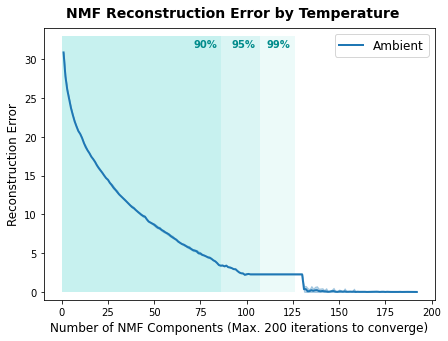

In [17]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Absolute W Matrix Agreement
#ax[0].plot(np.arange(1,48,1),cce1_rt_mean, color='mediumturquoise', zorder=2, label='Run 1')
#ax[0].fill_between(np.arange(1,48,1), cce1_rt_min, cce1_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce2_rt_mean, color='darkcyan', zorder=2, label='Run 2')
#ax[0].fill_between(np.arange(1,48,1), cce2_rt_min, cce2_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce3_rt_mean, color='dodgerblue', zorder=2, label='Run 3')
#ax[0].fill_between(np.arange(1,48,1), cce3_rt_min, cce3_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce4_rt_mean, color='blue', zorder=2, label='Run 4')
#ax[0].fill_between(np.arange(1,48,1), cce4_rt_min, cce4_rt_max, color='paleturquoise', zorder=1)

#ax[0].set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
#ax[0].set_ylabel('Mean sum of W matrix values per sample', fontsize=12)

# plot Reconstruction Errors
ax.plot(np.arange(1,193,1),cce_rt_err, color='tab:blue', zorder=2, linewidth=2, label='Ambient')
ax.fill_between(np.arange(1,193,1), cce_rt_err_min, cce_rt_err_max, color='tab:blue', alpha=0.3, zorder=1)
#ax.plot(np.arange(1,193,1),cce_50_err, color='darkcyan', zorder=2, label='Warm')
#ax.fill_between(np.arange(1,193,1), cce_50_err_min, cce_50_err_max, color='darkcyan', alpha=0.5, zorder=1)
#ax.plot(np.arange(1,193,1),cce_ST_err, color='tab:blue', zorder=2, label='Solvothermal')
#ax.fill_between(np.arange(1,193,1), cce_ST_err_min, cce_ST_err_max, color='tab:blue', alpha=0.5, zorder=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Reconstruction Error', fontsize=12)
ax.set_ylim(-1,34)
y11,y12 = 0,33

# annotate levelling off of reconstruction error reduction
#ax.plot([126,126], [y11,17.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Ambient  107',xy=(107-4.7,16.5), color='grey', fontweight='bold')
#ax.plot([133,133], [y11,15.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Warm  105',xy=(105-4.7,14.5), color='grey', fontweight='bold')
#ax.plot([100,100], [y11,13.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Solvothermal  76',xy=(76-4.7,12.5), color='grey', fontweight='bold')
#ax.plot([42,42], [y11,11.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Run 4  42',xy=(42-4.7,10.5), color='grey', fontweight='bold')
# 86, 107, 126

x90, x95, x99 = 86, 107, 126
ax.fill_between([0,x90], [y11,y11], [y12,y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.3)
ax.annotate('90%', xy=(x90-15,31.5), c='darkcyan', fontweight='bold')
ax.fill_between([x90,x95], [y11], [y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.2)
ax.annotate('95%', xy=(x95-15,31.5), c='darkcyan', fontweight='bold')
ax.fill_between([x95,x99], [y11], [y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.1)
ax.annotate('99%', xy=(x99-15,31.5), c='darkcyan', fontweight='bold')

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration, Ambient Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('NMF Reconstruction Error by Temperature', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_all rt.png')

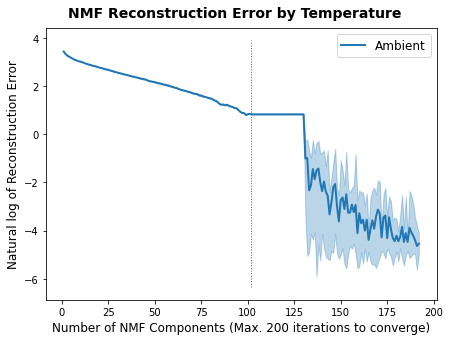

In [18]:
cce_rt_err_log = [math.log(x) for x in cce_rt_err]
cce_rt_err_min_log = [math.log(x) for x in cce_rt_err_min]
cce_rt_err_max_log = [math.log(x) for x in cce_rt_err_max]

# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.plot(np.arange(1,193,1),cce_rt_err_log, color='tab:blue', zorder=2, linewidth=2, label='Ambient')
ax.fill_between(np.arange(1,193,1), cce_rt_err_min_log, cce_rt_err_max_log, color='tab:blue', alpha=0.3, zorder=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Natural log of Reconstruction Error', fontsize=12)

y1, y2 = ax.get_ylim()
cutoff = 102
ax.plot([cutoff,cutoff],[y1,y2], color='tab:blue', linestyle=':', zorder=2, linewidth=1)

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration, Ambient Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('NMF Reconstruction Error by Temperature', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_all rt_log.png')

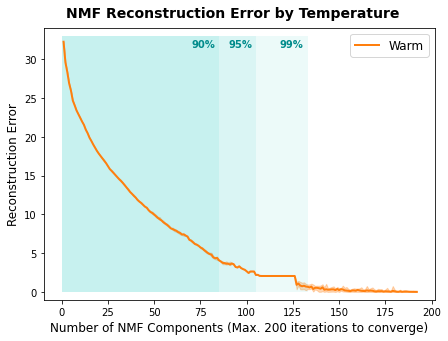

In [19]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Absolute W Matrix Agreement
#ax[0].plot(np.arange(1,48,1),cce1_rt_mean, color='mediumturquoise', zorder=2, label='Run 1')
#ax[0].fill_between(np.arange(1,48,1), cce1_rt_min, cce1_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce2_rt_mean, color='darkcyan', zorder=2, label='Run 2')
#ax[0].fill_between(np.arange(1,48,1), cce2_rt_min, cce2_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce3_rt_mean, color='dodgerblue', zorder=2, label='Run 3')
#ax[0].fill_between(np.arange(1,48,1), cce3_rt_min, cce3_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce4_rt_mean, color='blue', zorder=2, label='Run 4')
#ax[0].fill_between(np.arange(1,48,1), cce4_rt_min, cce4_rt_max, color='paleturquoise', zorder=1)

#ax[0].set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
#ax[0].set_ylabel('Mean sum of W matrix values per sample', fontsize=12)

# plot Reconstruction Errors
#ax.plot(np.arange(1,193,1),cce_rt_err, color='dodgerblue', zorder=2, label='Ambient')
#ax.fill_between(np.arange(1,193,1), cce_rt_err_min, cce_rt_err_max, color='dodgerblue', alpha=0.5, zorder=1)
ax.plot(np.arange(1,193,1),cce_50_err, color='tab:orange', zorder=2, linewidth=2, label='Warm')
ax.fill_between(np.arange(1,193,1), cce_50_err_min, cce_50_err_max, color='tab:orange', alpha=0.3, zorder=1)
#ax.plot(np.arange(1,193,1),cce_ST_err, color='tab:blue', zorder=2, label='Solvothermal')
#ax.fill_between(np.arange(1,193,1), cce_ST_err_min, cce_ST_err_max, color='tab:blue', alpha=0.5, zorder=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Reconstruction Error', fontsize=12)
ax.set_ylim(-1,34)
y11,y12 = 0,33

# annotate levelling off of reconstruction error reduction
#ax.plot([126,126], [y11,17.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Ambient  107',xy=(107-4.7,16.5), color='grey', fontweight='bold')
#ax.plot([133,133], [y11,15.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Warm  105',xy=(105-4.7,14.5), color='grey', fontweight='bold')
#ax.plot([100,100], [y11,13.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Solvothermal  76',xy=(76-4.7,12.5), color='grey', fontweight='bold')
#ax.plot([42,42], [y11,11.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Run 4  42',xy=(42-4.7,10.5), color='grey', fontweight='bold')
# 86, 107, 126

x90, x95, x99 = 85, 105, 133
ax.fill_between([0,x90], [y11,y11], [y12,y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.3)
ax.annotate('90%', xy=(x90-15,31.5), c='darkcyan', fontweight='bold')
ax.fill_between([x90,x95], [y11], [y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.2)
ax.annotate('95%', xy=(x95-15,31.5), c='darkcyan', fontweight='bold')
ax.fill_between([x95,x99], [y11], [y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.1)
ax.annotate('99%', xy=(x99-15,31.5), c='darkcyan', fontweight='bold')

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration, Ambient Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('NMF Reconstruction Error by Temperature', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_all 50.png')

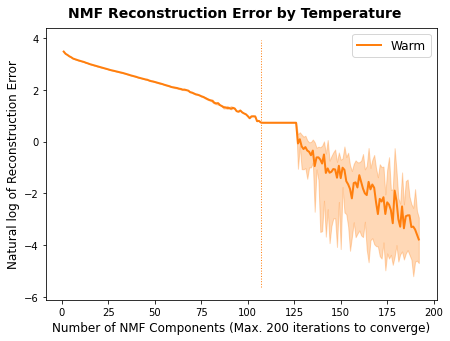

In [20]:
cce_50_err_log = [math.log(x) for x in cce_50_err]
cce_50_err_min_log = [math.log(x) for x in cce_50_err_min]
cce_50_err_max_log = [math.log(x) for x in cce_50_err_max]

# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.plot(np.arange(1,193,1),cce_50_err_log, color='tab:orange', zorder=2, linewidth=2, label='Warm')
ax.fill_between(np.arange(1,193,1), cce_50_err_min_log, cce_50_err_max_log, color='tab:orange', alpha=0.3, zorder=1)

y1, y2 = ax.get_ylim()
cutoff = 107
ax.plot([cutoff,cutoff],[y1,y2], color='tab:orange', linestyle=':', zorder=2, linewidth=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Natural log of Reconstruction Error', fontsize=12)

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration, Ambient Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('NMF Reconstruction Error by Temperature', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_all 50_log.png')

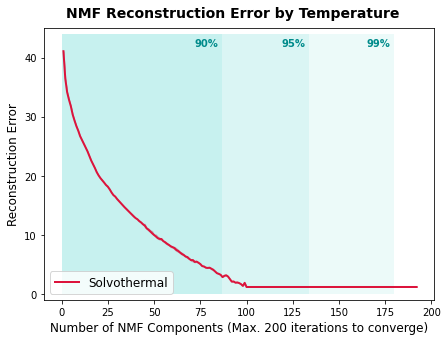

In [21]:
# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot Absolute W Matrix Agreement
#ax[0].plot(np.arange(1,48,1),cce1_rt_mean, color='mediumturquoise', zorder=2, label='Run 1')
#ax[0].fill_between(np.arange(1,48,1), cce1_rt_min, cce1_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce2_rt_mean, color='darkcyan', zorder=2, label='Run 2')
#ax[0].fill_between(np.arange(1,48,1), cce2_rt_min, cce2_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce3_rt_mean, color='dodgerblue', zorder=2, label='Run 3')
#ax[0].fill_between(np.arange(1,48,1), cce3_rt_min, cce3_rt_max, color='paleturquoise', zorder=1)
#ax[0].plot(np.arange(1,48,1),cce4_rt_mean, color='blue', zorder=2, label='Run 4')
#ax[0].fill_between(np.arange(1,48,1), cce4_rt_min, cce4_rt_max, color='paleturquoise', zorder=1)

#ax[0].set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
#ax[0].set_ylabel('Mean sum of W matrix values per sample', fontsize=12)

# plot Reconstruction Errors
#ax.plot(np.arange(1,193,1),cce_rt_err, color='dodgerblue', zorder=2, label='Ambient')
#ax.fill_between(np.arange(1,193,1), cce_rt_err_min, cce_rt_err_max, color='dodgerblue', alpha=0.5, zorder=1)
#ax.plot(np.arange(1,193,1),cce_50_err, color='darkcyan', zorder=2, label='Warm')
#ax.fill_between(np.arange(1,193,1), cce_50_err_min, cce_50_err_max, color='darkcyan', alpha=0.5, zorder=1)
ax.plot(np.arange(1,193,1),cce_ST_err, color='crimson', zorder=2, linewidth=2, label='Solvothermal')
ax.fill_between(np.arange(1,193,1), cce_ST_err_min, cce_ST_err_max, color='crimson', alpha=0.3, zorder=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Reconstruction Error', fontsize=12)
ax.set_ylim(-1,45)
y11,y12 = 0,44

# annotate levelling off of reconstruction error reduction
#ax.plot([126,126], [y11,17.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Ambient  107',xy=(107-4.7,16.5), color='grey', fontweight='bold')
#ax.plot([133,133], [y11,15.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Warm  105',xy=(105-4.7,14.5), color='grey', fontweight='bold')
#ax.plot([100,100], [y11,13.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Solvothermal  76',xy=(76-4.7,12.5), color='grey', fontweight='bold')
#ax.plot([42,42], [y11,11.3], color='grey', linewidth=1, linestyle='--')
#ax.annotate('Run 4  42',xy=(42-4.7,10.5), color='grey', fontweight='bold')
# 87, 134, 180

x90, x95, x99 = 87, 134, 180
ax.fill_between([0,x90], [y11,y11], [y12,y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.3)
ax.annotate('90%', xy=(x90-15,42), c='darkcyan', fontweight='bold')
ax.fill_between([x90,x95], [y11], [y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.2)
ax.annotate('95%', xy=(x95-15,42), c='darkcyan', fontweight='bold')
ax.fill_between([x95,x99], [y11], [y12], facecolor='mediumturquoise', edgecolor=None, alpha=0.1)
ax.annotate('99%', xy=(x99-15,42), c='darkcyan', fontweight='bold')

# legends, titles
ax.legend(fontsize=12, loc='lower left')
#fig.suptitle('Common Component Exploration, Ambient Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('NMF Reconstruction Error by Temperature', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_all ST.png')

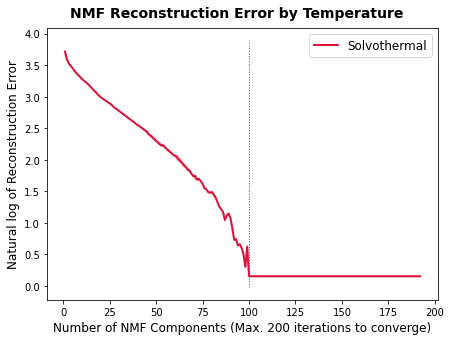

In [22]:
cce_ST_err_log = [math.log(x) for x in cce_ST_err]
cce_ST_err_min_log = [math.log(x) for x in cce_ST_err_min]
cce_ST_err_max_log = [math.log(x) for x in cce_ST_err_max]

# setup chart area
fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.plot(np.arange(1,193,1),cce_ST_err_log, color='crimson', zorder=2, linewidth=2, label='Solvothermal')
ax.fill_between(np.arange(1,193,1), cce_ST_err_min_log, cce_ST_err_max_log, color='crimson', alpha=0.3, zorder=1)

y1, y2 = ax.get_ylim()
cutoff = 100
ax.plot([cutoff,cutoff],[y1,y2], color='crimson', linestyle=':', zorder=2, linewidth=1)

ax.set_xlabel('Number of NMF Components (Max. 200 iterations to converge)', fontsize=12)
ax.set_ylabel('Natural log of Reconstruction Error', fontsize=12)

# legends, titles
ax.legend(fontsize=12, loc='upper right')
#fig.suptitle('Common Component Exploration, Ambient Conditions\n Reconstruction Error', y=0.98, fontsize=14, fontweight='bold')
fig.suptitle('NMF Reconstruction Error by Temperature', y=0.94, fontsize=14, fontweight='bold')

# save figure
fig.savefig('output_interpretation//CCE_NMF reconstruction error_all ST_log.png')

## Export for Next Step

In [59]:
np.savetxt('output_interpretation//cce_arr_rt_Part3.csv', arr_rt, delimiter=',')

np.savetxt('output_interpretation//cce_arr_50_Part3.csv', arr_50, delimiter=',')

np.savetxt('output_interpretation//cce_arr_ST_Part3.csv', arr_ST, delimiter=',')